# TCCM Homework:<br>**Quality rating of red wines by logistic regression**




<div class="intro">
    
<p style="text-align: center"><img width="650px" src="https://github.com/rpoteau/pyPhysChem/blob/main/DS4B-CO2-images/vinho-verde-header.jpg?raw=1" style="margin-left:auto; margin-right:auto" id="img_vinho_verde"></p>
<br>

1. The purpose of this project is to **predict the quality** of Portuguese Vinho Verde wines based on their **physicochemical components**. The intent is to **replace a panel of wine tasters with an artificial neural network**.

2. Two **datasets** (one for white wines and the other for red wines) are downloadable on the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). The input variables (descriptors) are
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Whereas the output variable, ***i.e.* the target**, is a 0 to 10 quality score, based on sensory data

3. **Bibliography**. There are two main references:
- An [original paper](https://doi.org/10.1016/j.dss.2009.05.016): Modeling wine preferences by data mining from physicochemical properties (**2009**), by Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, José Reis, *Decision Support Systems* **47**: 547-553
- A [Wine Project github repository](https://github.com/kmspitzer/final-wineproject), at the core of the [Wine Quality website](https://ucsd-winequality.herokuapp.com/). Authors explored several classifiers: K Nearest Neighbors, Decision Tree, Random Forest, Random Forest Regressor, Stochastic Gradient Descent, Support Vector Classification, Linear Support Vector Classification, AdaBoost Classifier, Gradient Boost Classifier, XGB Classifier, and obtained 69% to 95% performance, the highest being from the Random Forest Regression, Random Forest, and XGBoost models.

Some useful pieces of codes will be found on the previous website as well as on the present pyPhysChem repository. If you analyze the ML notebooks carefully, you will see that some pieces of code such as automatic one-hot encoding etc... are available, although they might have not been used during the talktorials (see the [DS4B-Appendix.ipynb notebook](./DS4B-Appendix.ipynb) and the [tools4PytChem.py scripts](./config/tools4PytChem.py))

4. **Mandatory implementation**.

- [x] The code will be developed in Python, in **this Jupyter notebook**, using mainly the Keras and Tensorflow ML libraries, although some ML SciKit Learn tools can also be used, if necessary.
- [x] It will be commented both using **Markdown cells** and **Python block comments or inline comments**.
- [x] No separate report is required, the **final present notebook** will be used both to evaluate the code and to explain the purpose of each section and how the results should be analyzed.
- [x] Particular attention will be paid to the **organization of the notebook**: use headers, ordered or unordered list of items, tables, mathematical formulas, hyperlinks, images, ....
- As done in the [Wine Project available in github](https://github.com/kmspitzer/final-wineproject),
- [x] **data will be cleaned and prepared**.
- [x] A correlation matrix will plotted. You will do that separately for white and red wines. It could be interesting - or not -  to build a database mixing red and white wines, with a 12th descriptor for the wine color.
- [x]  You will try either a **simple ANN** and a **deep learning approach**. In addition to the accuracy of each tested ANN architecture, a **confusion matrix** would be helpful to better assess their performance.
- [x] The numerical stability of the best model will be assessed using a **5-fold cross validation**.
</div>


<div class="rqT" title="Which libraries or skills do you need?">

- management of datas with `pandas`: see basic applications in the [iris1 notebook](./DS4B-Iris1.ipynb)
- definition and training of an ANN model with `keras`, such as done with the ["CO<sub>2</sub> solubility in ILs" notebook](DS4B-CO2_solubility-ANN.ipynb)
- look at the possibility to do a logistic regression, as done with the [identification of Iris species in the iris3 notebook](./DS4B-Iris3.ipynb)
- `matplotlib` and `seaborn` could be useful as well, to produce nice graphical analysis
- the `rdkit` library is not needed, as the various wines seem to differ only by the concentration of chemical compounds, not their nature

>[TCCM Homework:Quality rating of red wines by logistic regression](#scrollTo=StKNitI90171)

>[0. Imports](#scrollTo=_de8OEK30rLE)

>[1. Loading data](#scrollTo=-xz85Co_ELxc)

>[2. Data exploration](#scrollTo=FiSe1rZ8rJBW)

>>[2.0 Quality distribution and general statistics](#scrollTo=l_DTV9Syt-fC)

>>[2.1 Correlation matrix](#scrollTo=eM9nEzINKH2I)

>>[2.2 Features vs quality](#scrollTo=MMOCcbYhKQK0)

>>[2.3 Boxplots](#scrollTo=3KG_9EC8qvBR)

>>[2.4 Density plots](#scrollTo=9qrNvwqbypTW)

>[3. Data preprocessing](#scrollTo=7NKJrhAplRIN)

>[4. Models training and evaluation](#scrollTo=ewJ4Q_ynmhbc)

>[5. Benchmarking](#scrollTo=KwyCuwEQ28bS)

>[6. Results](#scrollTo=p7RZ4KYT16fX)

>>[6.0 Red wine models reports](#scrollTo=2ytDntW1wBsu)

>>[6.1 White wine models reports](#scrollTo=lfTYLuO1wGCW)



Here is the link for colab notebook: https://colab.research.google.com/drive/1MlCaPzAeDgIFtDjWXyXuhkYABZPw301F?usp=sharing

# 0. Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import warnings
import itertools
import copy
import os
import sys
from scipy.stats import skew
from keras.layers import Dropout

# 1. Loading data

To make things easier, below I added import  of files from my GitHub, so no need to manually upload it.

In [1]:
!git clone https://github.com/AnnaKelmanson/TCCM_HWs.git

Cloning into 'TCCM_HWs'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14 (delta 1), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 113.19 KiB | 1.41 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
cd ./TCCM_HWs

/home/kelmanson/Desktop/TCCM/TCCM_HWs


Commads below read csv files and create two separate pandas dataframes -- one for red wine, the other one for white.

In [ ]:
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
white_wine = pd.read_csv('winequality-white.csv', sep = ';')

*splitting_into_X_Y* just split a dataset into X and Y matrices, X is for features, Y is for quality metrics. It returens two pandas dataframes consequently.



In [ ]:
def splitting_into_X_Y(dataset):
  copy_of_dataset = dataset
  Y = copy_of_dataset.iloc[:, -1].to_frame()
  X = copy_of_dataset.iloc[:, :-1]
  return X, Y

In [ ]:
X_red, Y_red = splitting_into_X_Y(red_wine)
X_white, Y_white = splitting_into_X_Y(white_wine)

# 2. Data exploration


Before learning models, we need to figure out how exactly we need to preprocess the given data.

## 2.0 Quality distribution and general statistics

Below are histograms showing the distribution of the number of samples by quality. We can notice that the data is very unbalanced, and this may further deteriorate the quality of training. In the next section on data preprocessing, I will introduce a function that cures this problem.

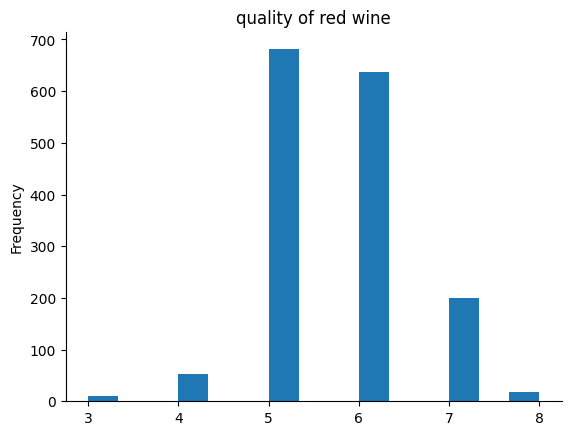

In [ ]:
red_wine['quality'].plot(kind='hist', bins=15, title='quality of red wine')
plt.gca().spines[['top', 'right',]].set_visible(False)

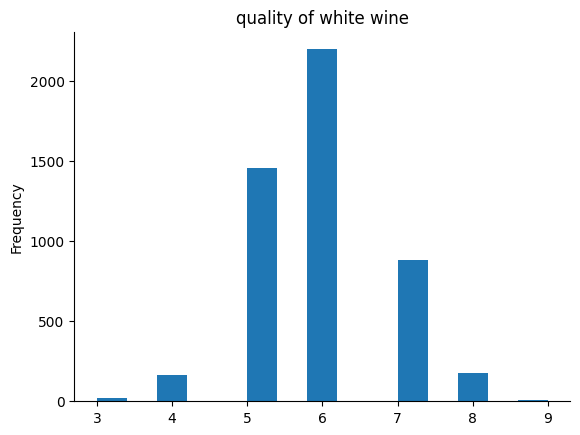

In [ ]:
white_wine['quality'].plot(kind='hist', bins=15, title='quality of white wine')
plt.gca().spines[['top', 'right',]].set_visible(False)

Below, *.describe()* just prints out the general statistics for a dataset. We can see that we have three times fewer samples of red wine in comparison to the white one.

In [ ]:
print('red wine')
red_wine.describe()

red wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.633521
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.783211
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,3.500000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,7.500000


In [ ]:
print('white wine')
white_wine.describe()

white wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.843069,0.274126,0.330196,6.376756,0.043510,35.101776,138.233156,0.994017,3.187104,0.487771,10.514267,5.860555
std,0.800015,0.087203,0.103506,4.983099,0.011295,16.008071,41.959107,0.002910,0.147199,0.107641,1.230621,0.836155
min,4.800000,0.080000,0.090000,0.600000,0.015000,2.000000,19.500000,0.987110,2.805000,0.220000,8.000000,3.500000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,8.800000,0.485000,0.570000,22.200000,0.071000,80.500000,255.500000,1.002666,3.565000,0.760000,14.200000,7.500000


Just to be sure that there are no NaN values:

In [ ]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 2.1 Correlation matrix

### Function: `plot_correlation`

#### Description
This function visualizes the correlation matrix of a dataset using a heatmap.

#### Parameters
- `dataset`: The dataset for which the correlation matrix will be computed and visualized.

#### Process

1. **Compute Correlation Matrix**:
   The function starts by computing the correlation matrix of the dataset using `dataset.corr()`. The correlation matrix, \( C \), is defined as:

   $$ C = \begin{bmatrix}
   corr(X_1, X_1) & corr(X_1, X_2) & \cdots & corr(X_1, X_n) \\
   corr(X_2, X_1) & corr(X_2, X_2) & \cdots & corr(X_2, X_n) \\
   \vdots & \vdots & \ddots & \vdots \\
   corr(X_n, X_1) & corr(X_n, X_2) & \cdots & corr(X_n, X_n)
   \end{bmatrix} $$

   where $( corr(X_i, X_j))$ represents the correlation coefficient between variables $( X_i)$ and $( X_j )$.

   $$сorr(xy) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$


2. **Plotting Setup**:
   - `plt.subplots(figsize=(10,7))`: This creates a figure and a set of subplots with the specified size (10x7 inches).

3. **Heatmap Visualization**:
   - `sns.heatmap(...)`: This function is used to create the heatmap.
   - The parameters are:
     - `corr`: The correlation matrix calculated earlier.
     - `xticklabels=corr.columns`: Labels for the x-axis taken from the column names of the correlation matrix.
     - `yticklabels=corr.columns`: Labels for the y-axis, similar to the x-axis.
     - `annot=True`: This ensures that the correlation values are annotated on the heatmap.
     - `cmap=sns.diverging_palette(20, 10, as_cmap=True)`: Defines the color palette for the heatmap. This particular palette creates a diverging color scheme.


#### Output
The function outputs a heatmap representing the correlation matrix of the dataset. In this heatmap, each cell represents the correlation coefficient between the variables, providing a visual representation of how closely the variables are linearly related.


In [ ]:
def plot_correlation(dataset):
  corr = dataset.corr()
  plt.subplots(figsize=(10,7))
  sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(20, 10, as_cmap=True))
  plt.show()

### Red wine

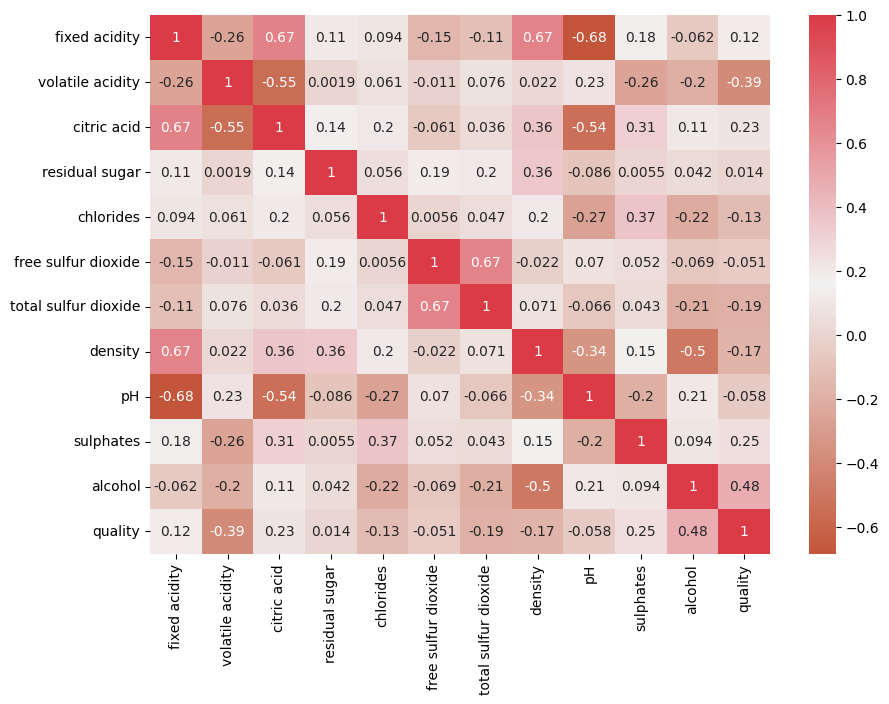

In [ ]:
plot_correlation(red_wine)

The plot above represents the correlation matrix for the red wine dataset. Herein, we do not see **very strong correlation** between any of the features, but some of them have **strong correlation**( between 0.6 and 0.8):


1. Fixed acidity and citric acid
2. Fixed acidity and density
3. Fixed acidity and pH (reversed correlation, which makes sense)

In general, it makes sense that the concentration of acids is correlated with pH. As far as I understand, pH is mainly affected by tartaric acid (aka fixed acidity) because of its higher dissociation order; see the table. Plus, there is a suppression of the dissociation of weaker acids. Therefore, the correlation between tartaric acid and pH is higher than with other acids.


|               | pKa1 | pKa2 |
| ------------- | ---- | ---- |
| tartaric acid | 2.89 | 4.40 |
| citric acid   | 3.13 | 4.76 |
| acetic acid   | 4.76 |   x  |

I can't comment on the other correlations, as I didn't study to be a sommelier, but I would hazard a guess that the correlation between tartaric and citric acid has something to do with the degree of maturity of the grapes. The correlation with density may have something to do with the fact that tartaric acid, under normal conditions, is a crystalline substance and sometimes precipitates. But that's my guess.

In general, the correlation values are not too high to cause multicollinearity problems. Therefore, in this dataset, I decided not to discard variables based on correlation.

### White wine

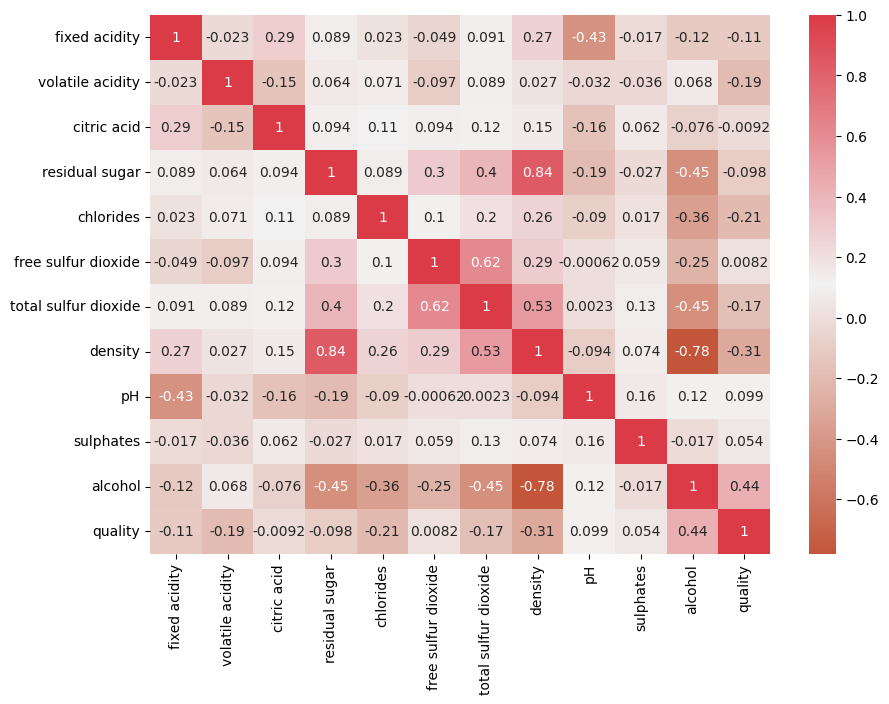

In [ ]:
plot_correlation(white_wine)

With white wine, the situation is more interesting. There are no strong correlations between acids and pH, but we can see obvious correlations between the amount of alcohol and wine density and a strong correlation between density and residual sugar, which was not the case in red wine.

Compared to red wine, white wine frequently has more residual sugar (https://home.binwise.com/blog/how-much-sugar-in-wine). Variations in the fermentation process are the cause of this.

The percentages of alcohol and sugar in a wine are what determine its density. Alcohol reduces density because it is less dense than water, but sugar increases it, obviously.

High residual sugar causes a higher density in white wine because it allows for an earlier termination of fermentation. This results in a stronger correlation between residual sugar and density, and this effect is less pronounced in red wine, where more complete fermentation typically results in a lower sugar content. Variations in the methods used to make wine also matter.

Despite the very strong correlation between density and residual sugar, I decided **not to remove one of the parameters**, as neural networks are in principle resistant to multicollinearity, both parameters carry critical information, and one cannot replace the other.

Also, because of the strong difference in the correlation profile of red and white wines, I think it is better to build the models separately. Plus, we have a lot more data on white wine than on red wine, which will make the joined model more biassed.

## 2.2 Features vs quality




### Function `VS(parameter, dataset)`:

This function is designed to visualize the relationship between a parameter (specified in `parameter`) and quality (`quality`) in the dataset `dataset`. It performs the following actions:

1. **Data Selection**: Creates a subset of data `data`, containing only the columns for the selected parameter and `quality`.
2. **Creating a Figure for the Plot**: Initializes a single plot with dimensions of 6x3 inches.
3. **Constructing a Bar Chart**: Uses `sns.barplot` to create a bar chart, where the X-axis represents the `quality`, and the Y-axis represents the values of the selected parameter.
4. **Graph Title**: Adds a title that indicates the relationship being analyzed, for example, "Alcohol VS quality".
5. **Displaying and Clearing the Graph**: Displays the graph and clears the created figure after its display to prevent overlay in subsequent calls.


In [ ]:
def VS(parameter, dataset):
  data = dataset[[parameter,'quality']]
  fig, axs = plt.subplots(ncols=1,figsize=(6,3))
  sns.barplot(x='quality', y=parameter, data=data, ax=axs)
  plt.title(f'{parameter} VS quality')

  plt.tight_layout()
  plt.show()
  plt.gcf().clear()

def vs_plots(dataset):
  for column in dataset.columns:
    if column != 'quality':
      VS(column, dataset)

### Red wine

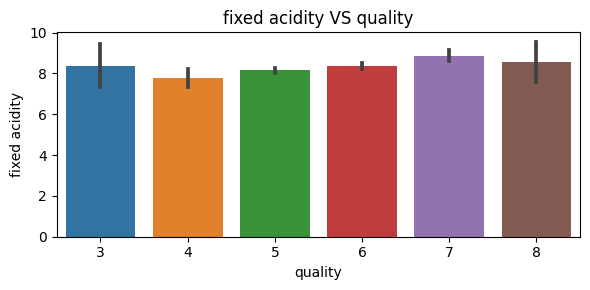

<Figure size 640x480 with 0 Axes>

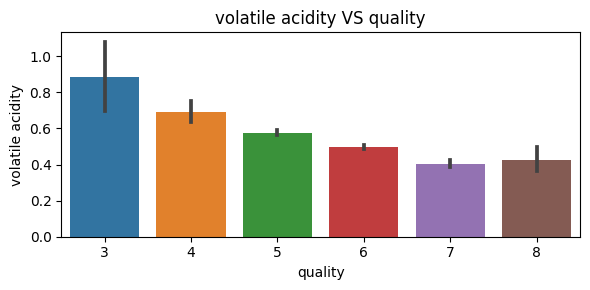

<Figure size 640x480 with 0 Axes>

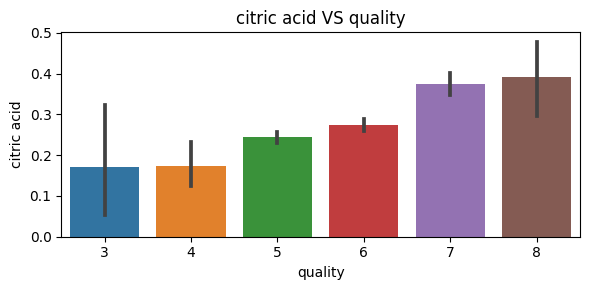

<Figure size 640x480 with 0 Axes>

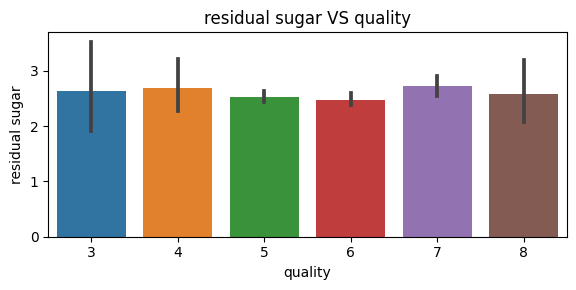

<Figure size 640x480 with 0 Axes>

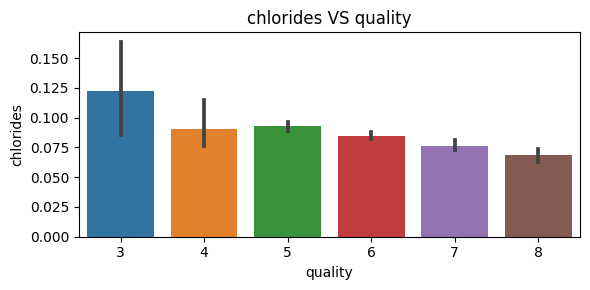

<Figure size 640x480 with 0 Axes>

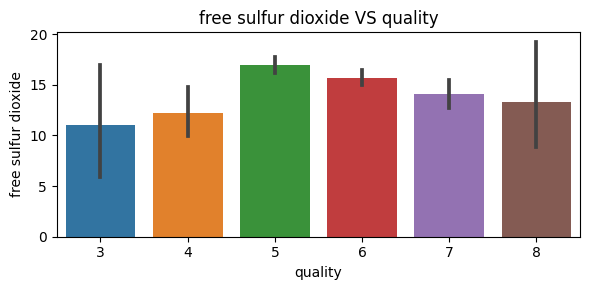

<Figure size 640x480 with 0 Axes>

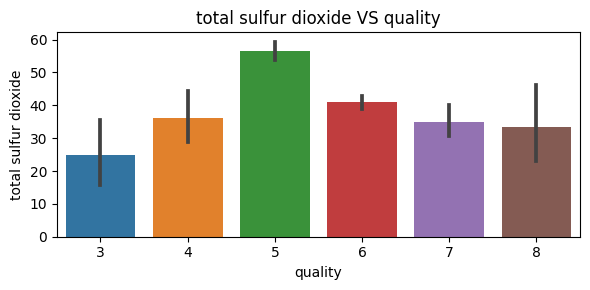

<Figure size 640x480 with 0 Axes>

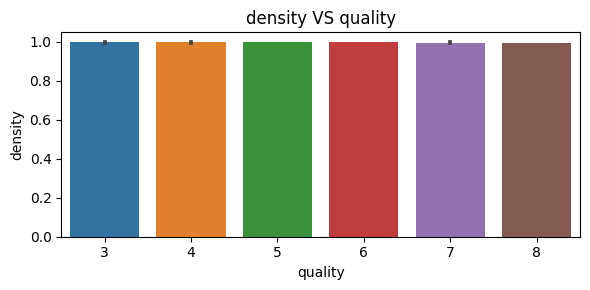

<Figure size 640x480 with 0 Axes>

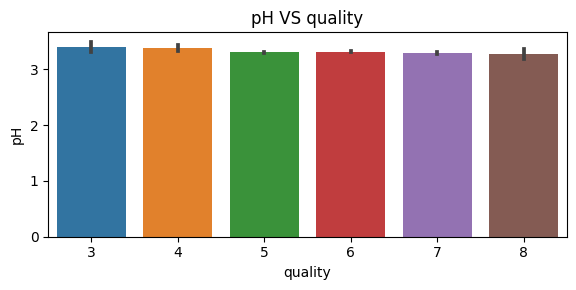

<Figure size 640x480 with 0 Axes>

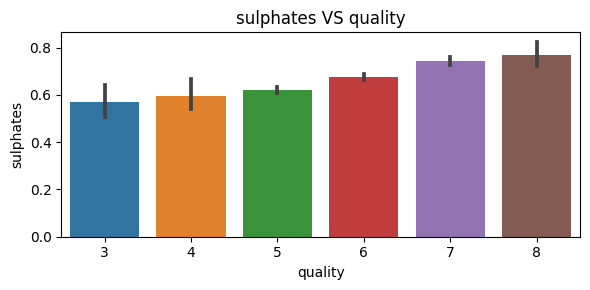

<Figure size 640x480 with 0 Axes>

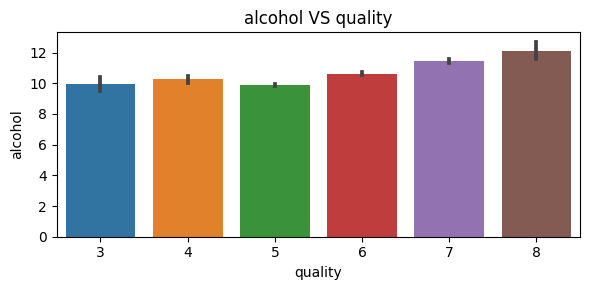

<Figure size 640x480 with 0 Axes>

In [ ]:
vs_plots(red_wine)



1.   **volatile acidity (acetic acid):** the higher -- the lower the quality. Makes sense, we don't like drinking vinegar :)
2.   **citric acid**: the higher -- the better is quality
3.  **chlorides**: the higher -- the lower is quality.  "In high concentration, gives the wine an undesirable salty taste and significantly decreases its market appeal" (https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf)
4. **sulphates**: the higher -- the better.
5. **alcohol**: the higher -- the better, obviously :)

The rest either do not have a particular tendency or it is not linear, and I have no clue how to explain.



### White wine

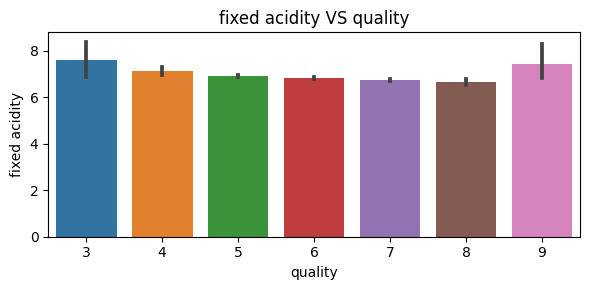

<Figure size 640x480 with 0 Axes>

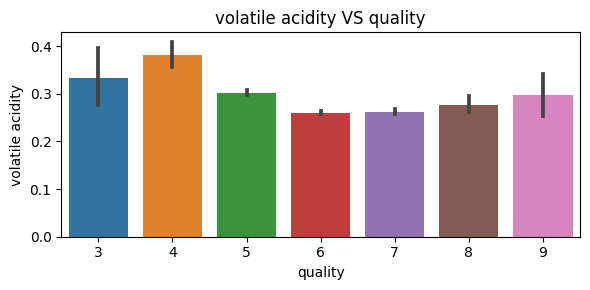

<Figure size 640x480 with 0 Axes>

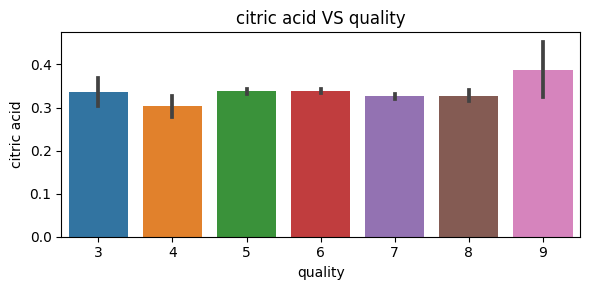

<Figure size 640x480 with 0 Axes>

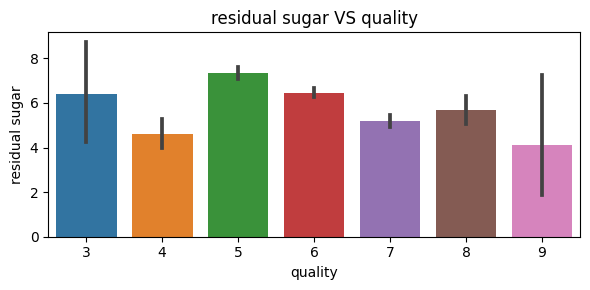

<Figure size 640x480 with 0 Axes>

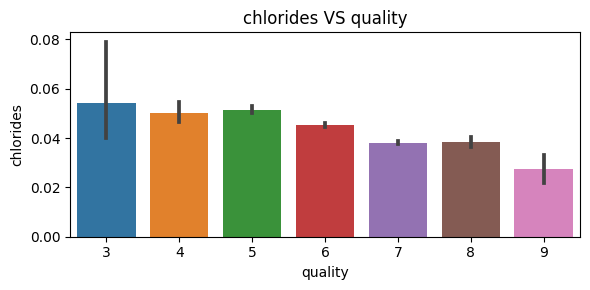

<Figure size 640x480 with 0 Axes>

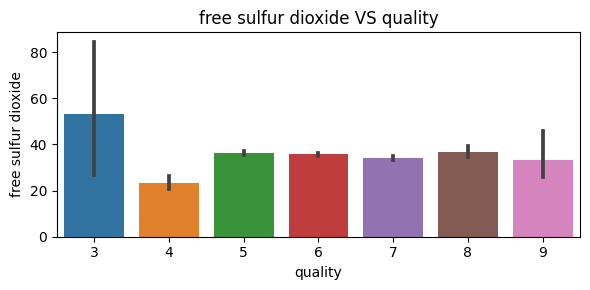

<Figure size 640x480 with 0 Axes>

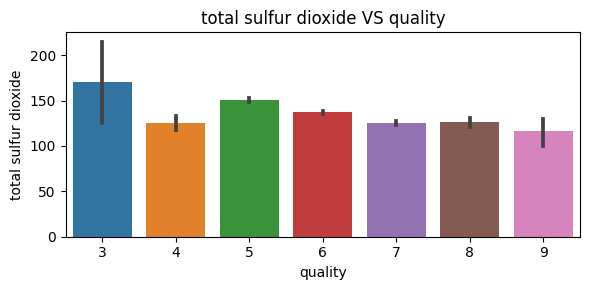

<Figure size 640x480 with 0 Axes>

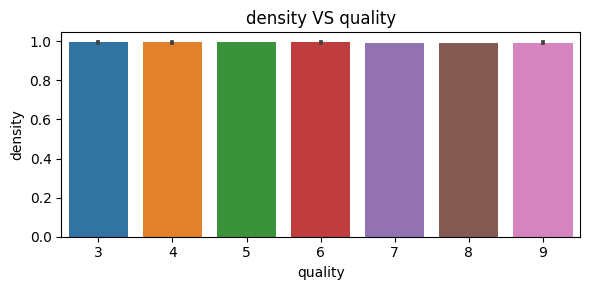

<Figure size 640x480 with 0 Axes>

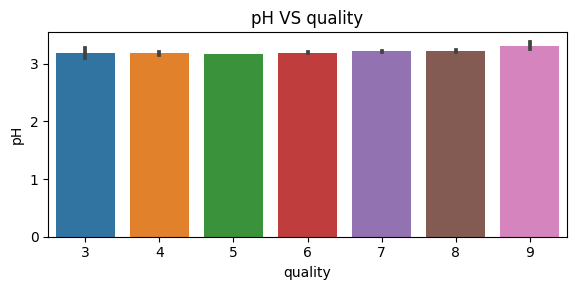

<Figure size 640x480 with 0 Axes>

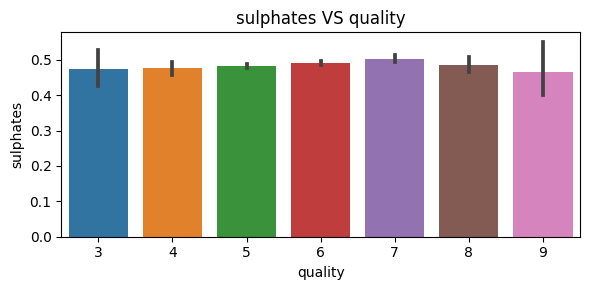

<Figure size 640x480 with 0 Axes>

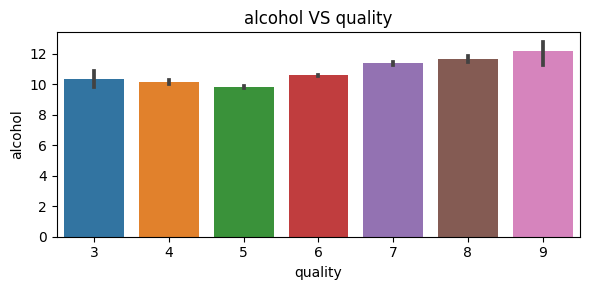

<Figure size 640x480 with 0 Axes>

In [ ]:
vs_plots(white_wine)

Here the picture is less obvious, except for the same tendency towards alcohol and chlorides.

## 2.3 Boxplots

The provided `boxplots` function is designed to generate boxplots for each feature in a wine dataset, relative to different quality levels of the wine. Boxplots are an effective way to visualize the distribution of data across different categories. It makes easy to spot outliers in the data. Also, it provides a clear view of the distribution of data, including the median, quartiles, and range.

### Function `boxplots` :

1. **Iterating Through Columns**: The function iterates through each column in the `wine_df` DataFrame, excluding the last column (presumably `quality`).

2. **Generating Boxplots**:
   - For each column (feature), the function generates a boxplot.
   - The boxplot is created for the selected feature across different quality levels (ranging from 1 to 10).
   - This is done by segmenting the data based on the `quality` column and then plotting the values of the current feature for each quality level.

3. **Setting Up the Plot**:
   - The title of each plot is set to the name of the current feature.
   - The X-axis is labeled as `quality`, representing different quality levels.
   - The Y-axis is labeled with the name of the feature, representing the distribution of that feature's values.




In [ ]:
def boxplots(wine_df):
  for label in wine_df.columns[:-1]:
      plt.boxplot([wine_df[wine_df['quality']==i][label]for i in range(1,11)])
      plt.title(label)
      plt.xlabel('quality')
      plt.ylabel(label)
      #plt.savefig("static/img/"+'red'.join(label.split(' ')))
      plt.show()

### Red wine

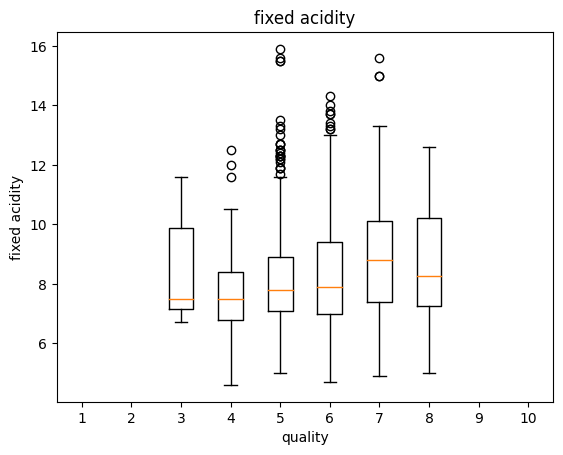

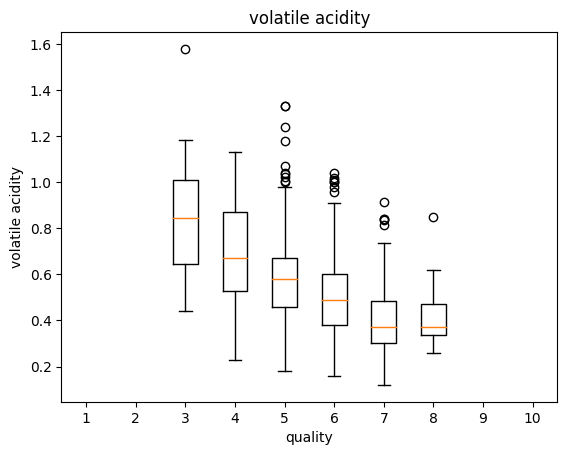

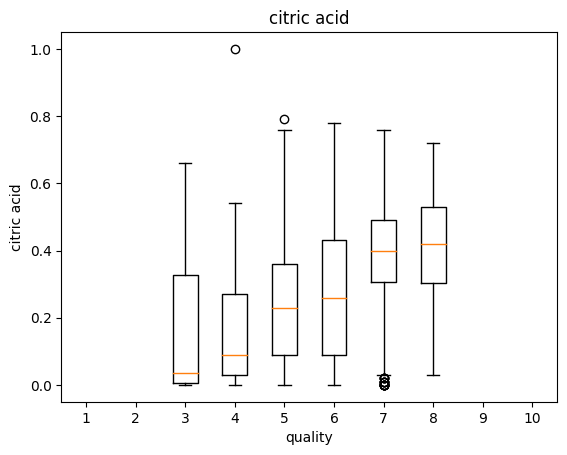

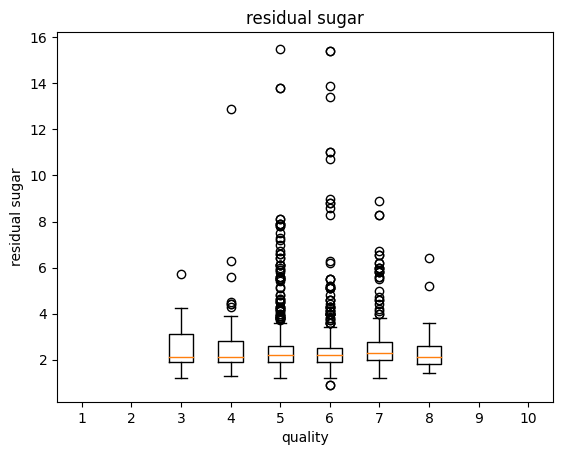

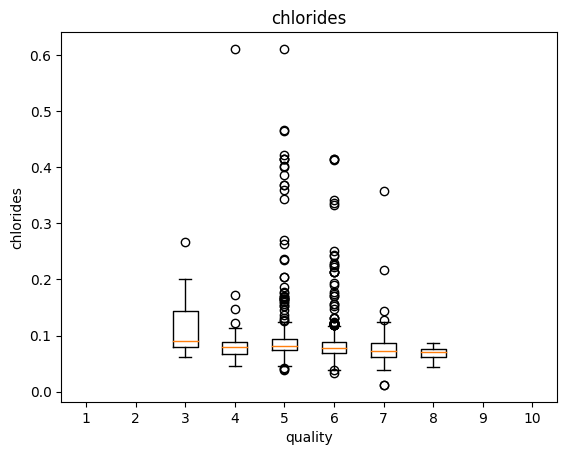

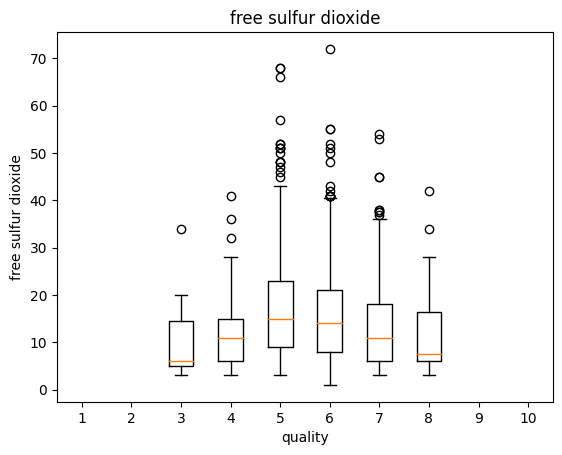

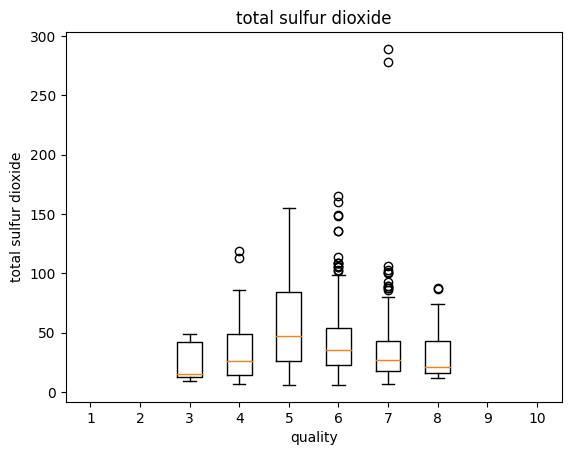

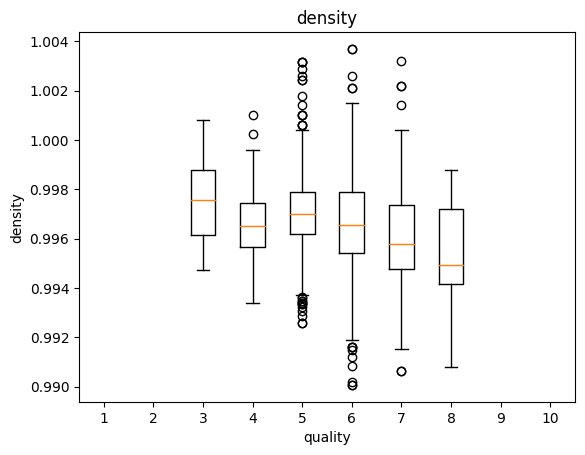

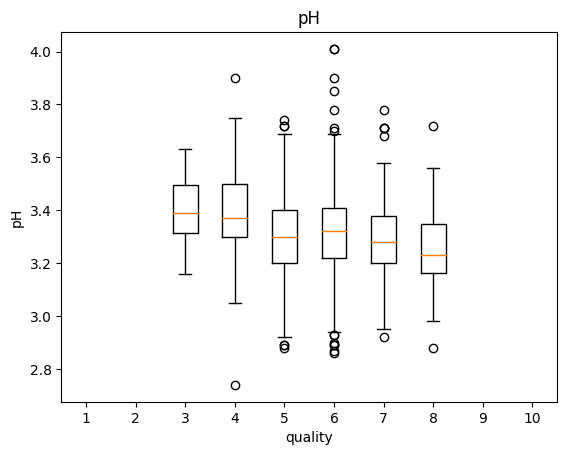

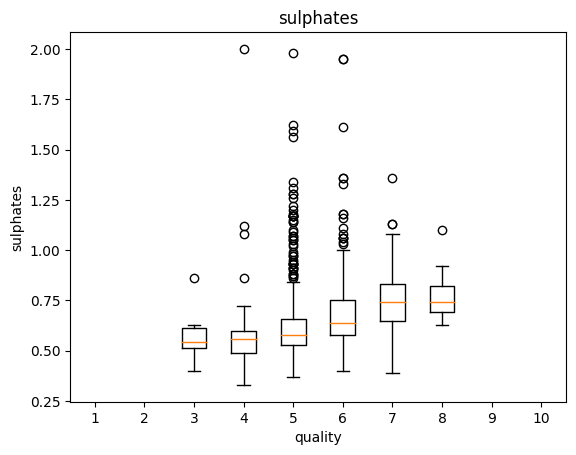

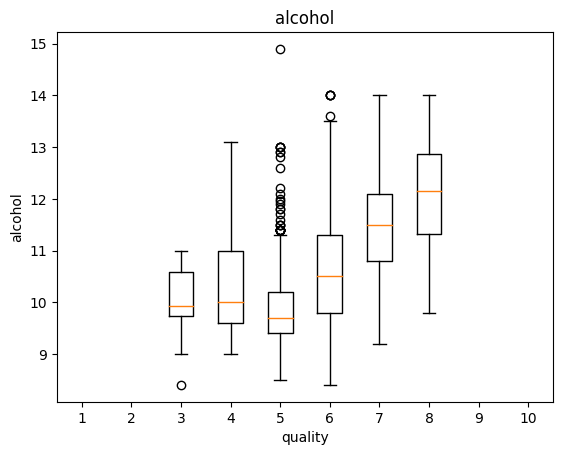

In [ ]:
boxplots(red_wine)

In the average wine categories, one can see a large number of outliers. It is certainly tempting to discard them in the hope that this will improve the dataset.

The `mod_outlier` function is designed to modify outliers in a DataFrame based on the Interquartile Range (IQR) method:

### Function `mod_outlier(df)`

1. **Copying the DataFrame**:
   - `df1 = df.copy()`: Creates a copy of the input DataFrame `df` and stores it in `df1`. This is done to preserve the original DataFrame and apply modifications to a new copy.

2. **Extracting Numeric Data**:
   - `df = df._get_numeric_data()`: Extracts only the numeric columns from `df`. This step is crucial because outlier modification is typically applied to quantitative data.

3. **Calculating Quartiles and IQR**:
   - `q1 = df.quantile(0.25)`: Calculates the first quartile (25th percentile) for each numeric column.
   - `q3 = df.quantile(0.75)`: Calculates the third quartile (75th percentile) for each numeric column.
   - `iqr = q3 - q1`: Computes the Interquartile Range (IQR), which is the difference between the third and first quartiles.

4. **Determining Outlier Bounds**:
   - `lower_bound = q1 - (1.5 * iqr)`: Calculates the lower bound for outliers. Any value below this threshold is considered an outlier.
   - `upper_bound = q3 + (1.5 * iqr)`: Calculates the upper bound for outliers. Any value above this threshold is considered an outlier.

5. **Modifying Outliers**:
   - The nested for-loop iterates over each column and each element within those columns.
   - It checks if any value is below the lower bound or above the upper bound for that column.
   - If a value is found to be an outlier, it is replaced with the respective lower or upper bound. This method is known as 'capping' or 'flooring' the outliers.

6. **Updating the Original Data**:
   - The second for-loop updates the original DataFrame copy `df1` with the modified values from `df`.
   - This step ensures that the non-numeric data in `df1` remains unchanged, while the numeric data is updated with the modified values.

7. **Return Statement**:
   - Finally, the function returns the modified DataFrame `df1`.



In [ ]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:
                    df[col][i] = upper_bound[col]


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

Let's see how boxplots will change after cleaning from outliers:

<ipython-input-15-95bb3d8d07f3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
<ipython-input-15-95bb3d8d07f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]


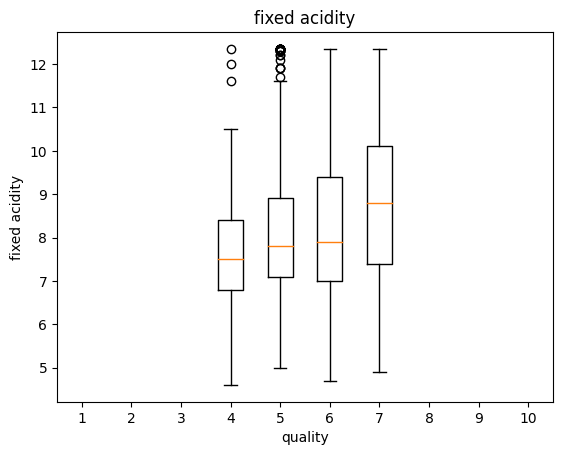

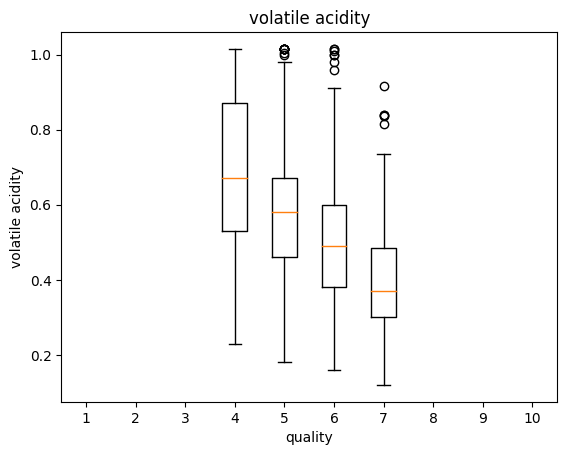

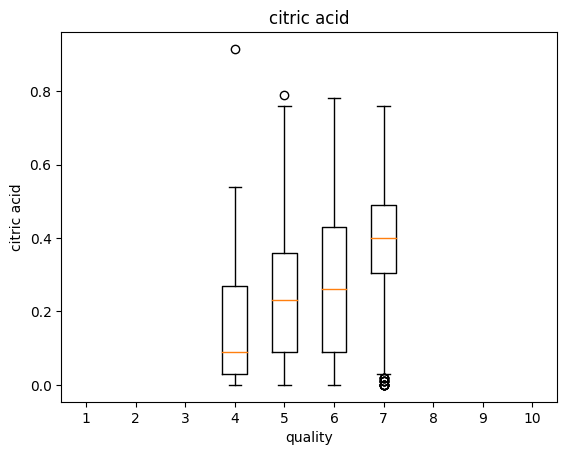

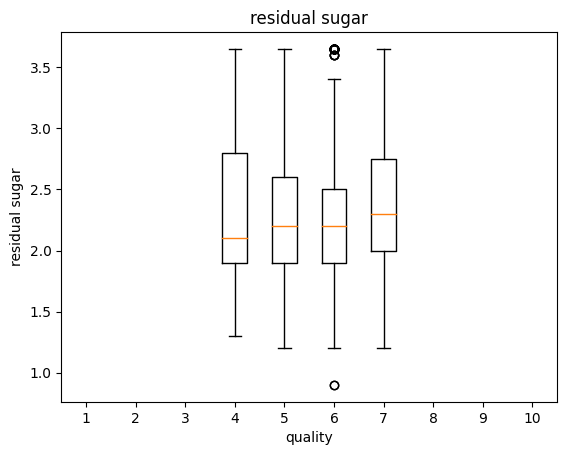

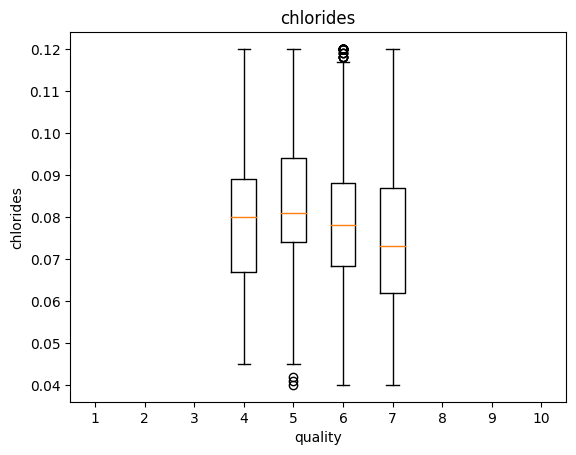

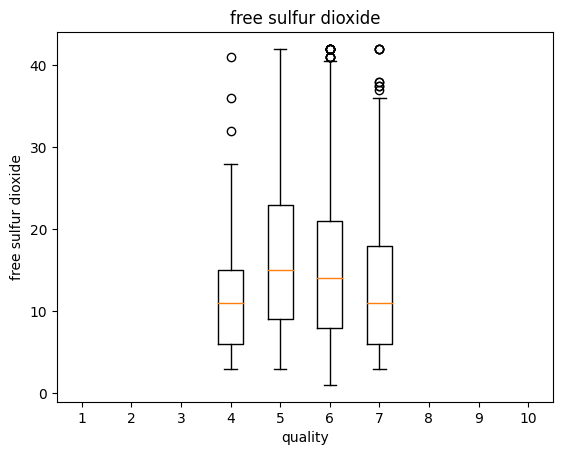

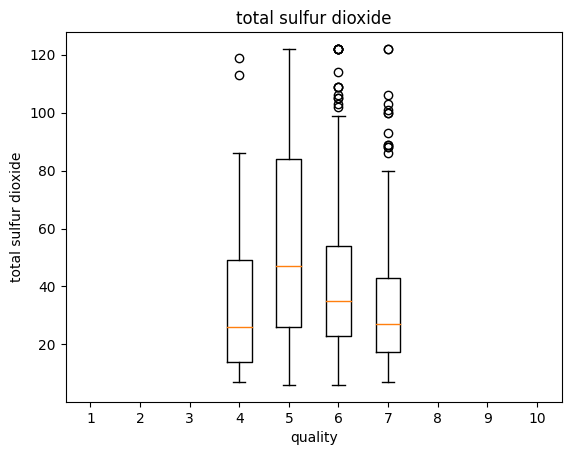

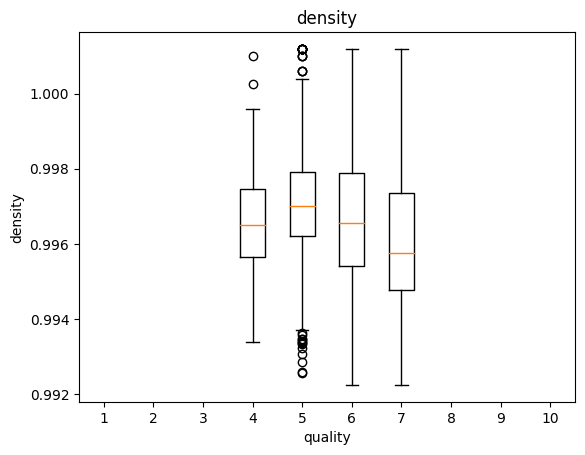

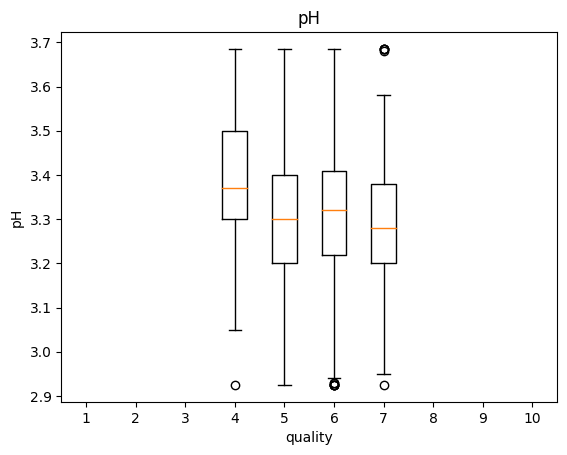

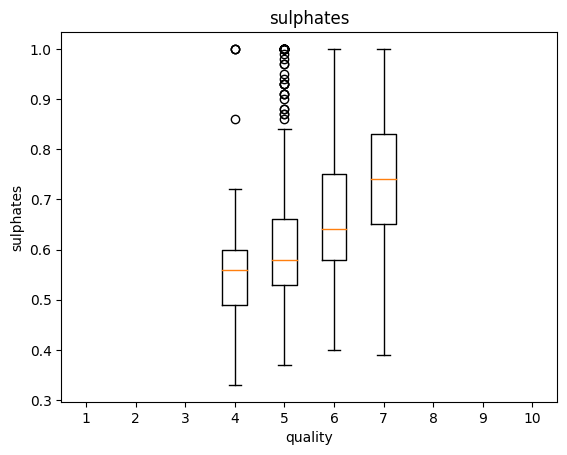

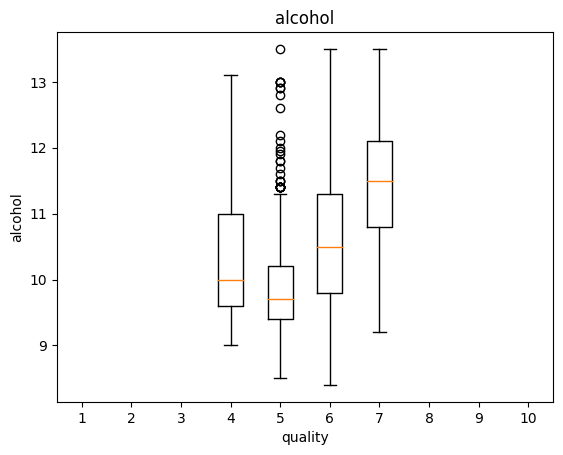

In [ ]:
boxplots(mod_outlier(red_wine))

Yes, the algorithm decided that wines that are too bad or too good are outliers. It has a point, technically, it is right :) In general, given that a sommelier's assessment does not lend itself to any specific formula and is most likely subjective, there will naturally be a lot of noise in the data. Given this specificity, I would not delete outliers.

### White wine

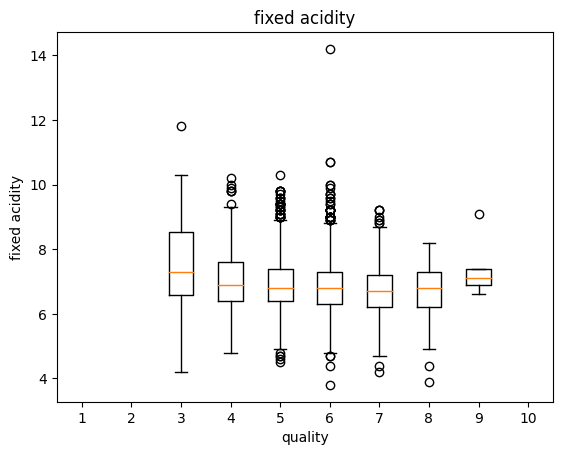

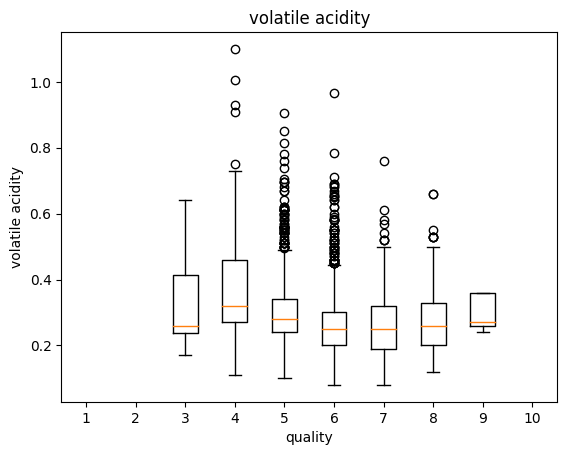

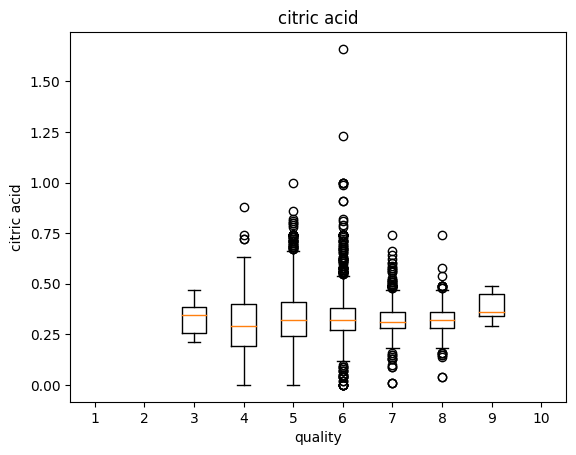

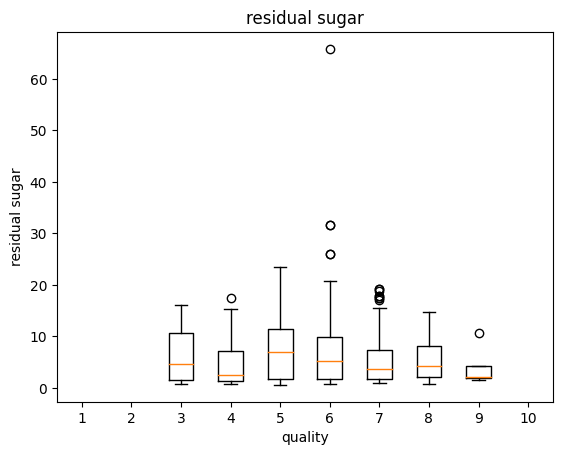

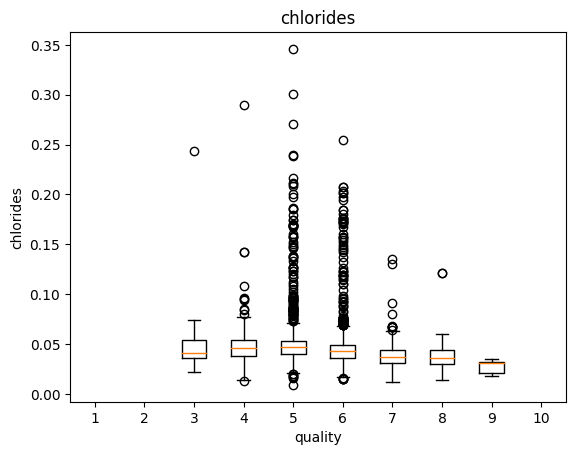

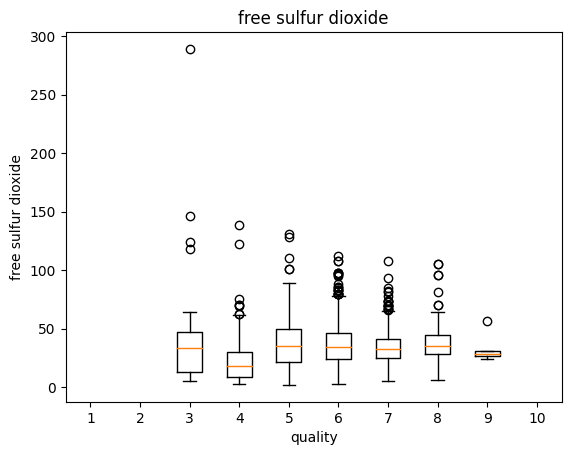

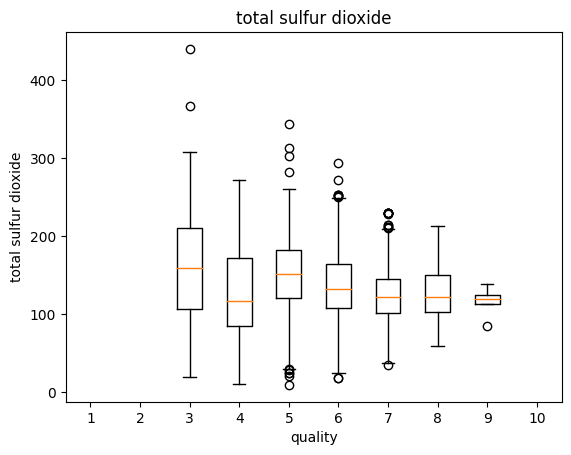

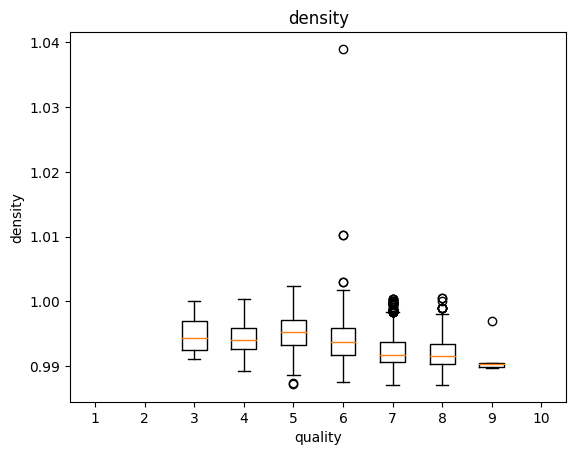

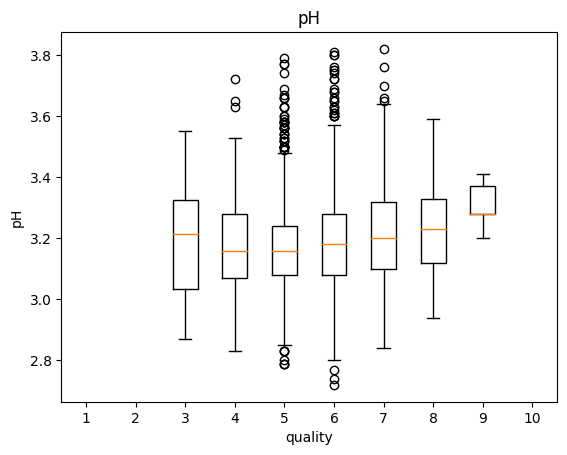

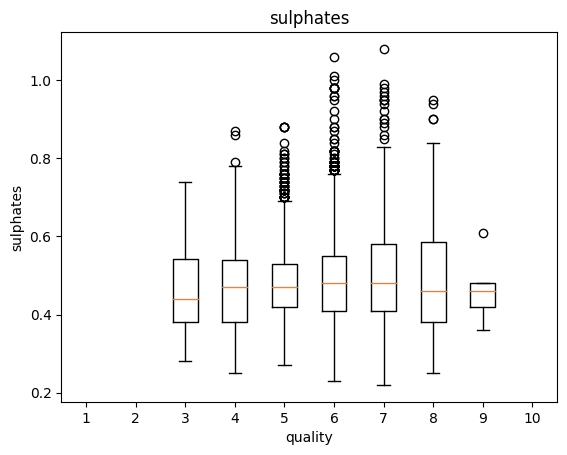

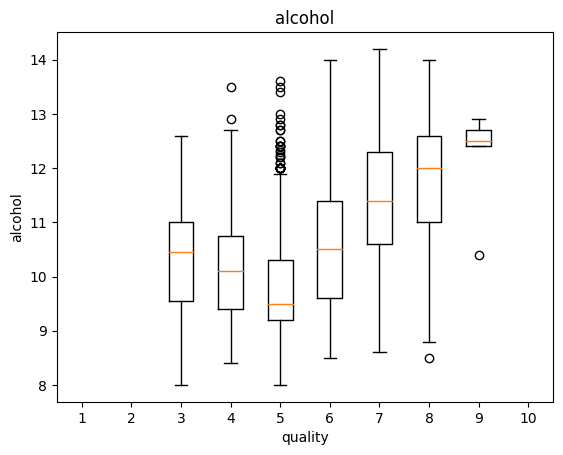

In [ ]:
boxplots(white_wine)

<ipython-input-15-95bb3d8d07f3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
<ipython-input-15-95bb3d8d07f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]


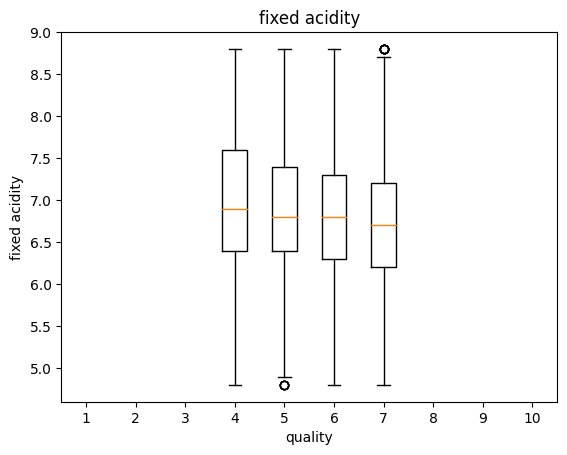

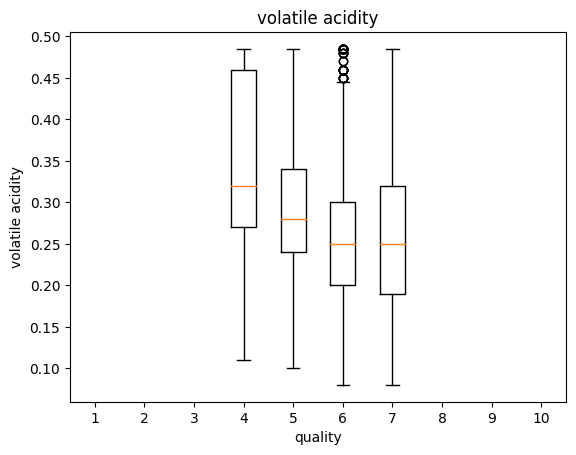

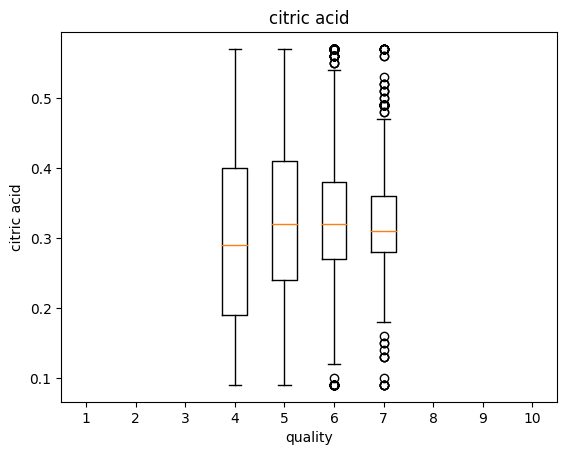

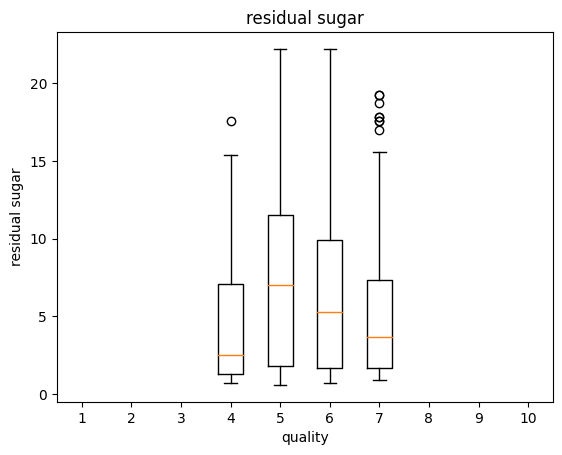

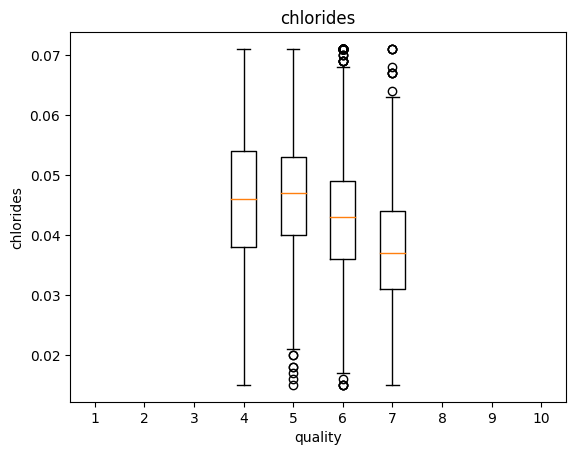

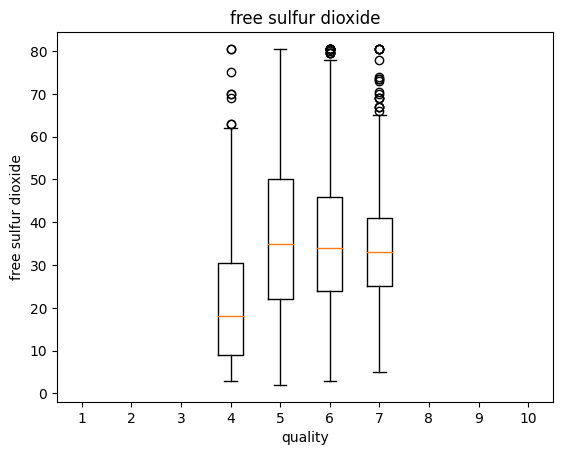

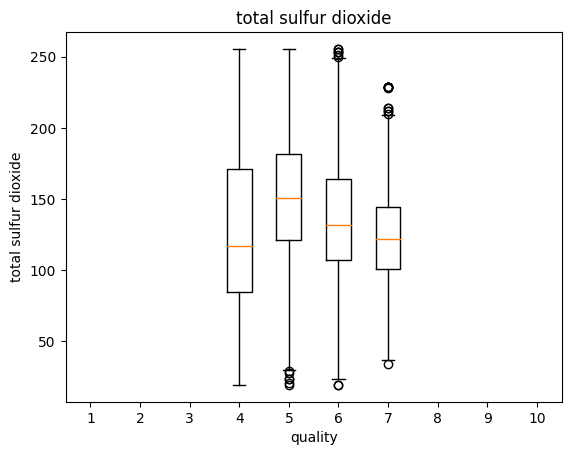

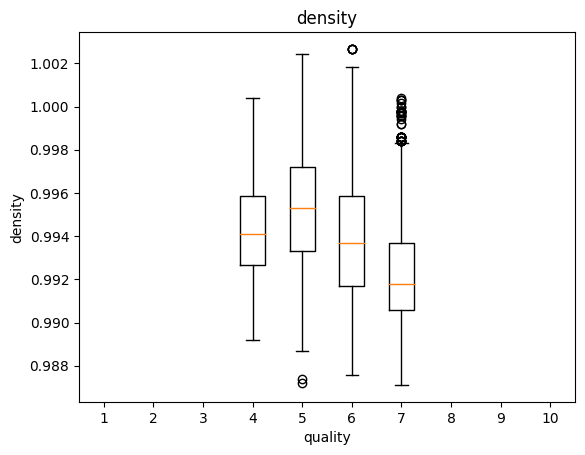

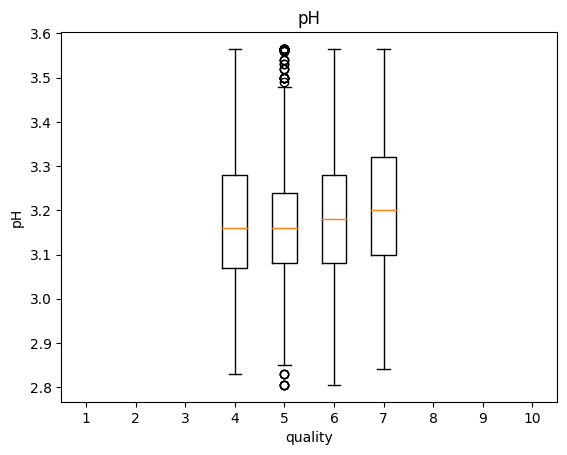

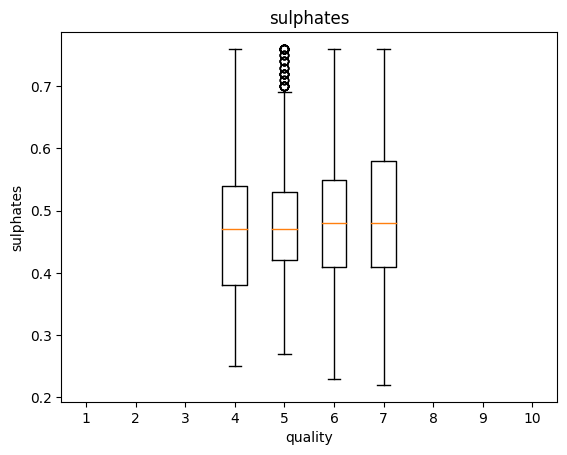

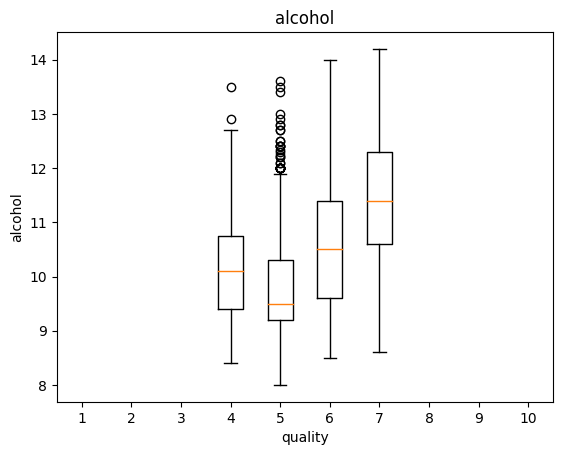

In [ ]:
boxplots(mod_outlier(white_wine))

## 2.4 Density plots

At the bottom are plots of the density distribution of values for certain wine parameters. Since one of the key quality characteristics for both types of wine is alcohol, let's take a closer look at the graphs:

<Axes: xlabel='alcohol', ylabel='Density'>

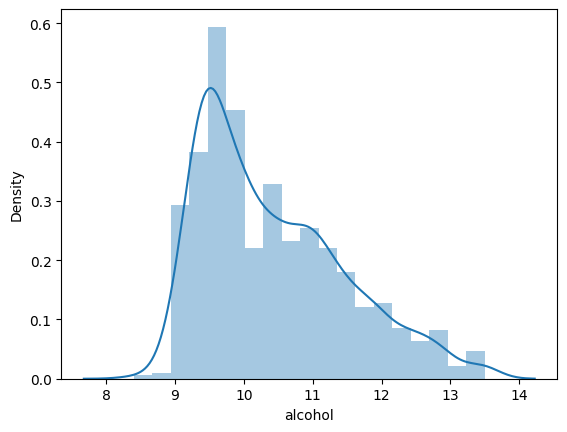

In [ ]:
sns.distplot(red_wine['alcohol'])

<Axes: xlabel='alcohol', ylabel='Density'>

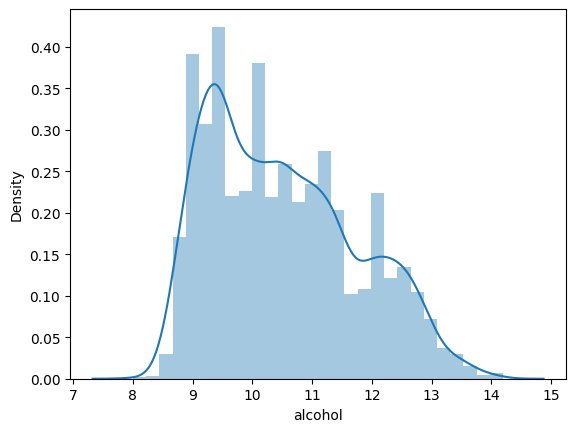

In [ ]:
sns.distplot(white_wine['alcohol'])

The *skew()* function in Python, applied to the 'alcohol' column in DataFrame red_wine, calculates the asymmetry of the distribution of values in that column. Asymmetry (or skew) is a measure of the asymmetry of the probability distribution around the mean value.

In [ ]:
skew(red_wine['alcohol'])

0.7946828280435413

In [ ]:
skew(white_wine['alcohol'])

0.48719273327634327

Red wines have more types with an alcohol percentage around 9.5, while white wines have a wider variety of this indicator. This may well be because we have 3 times more data for white wine.

The density plots below are presented for all parameters.

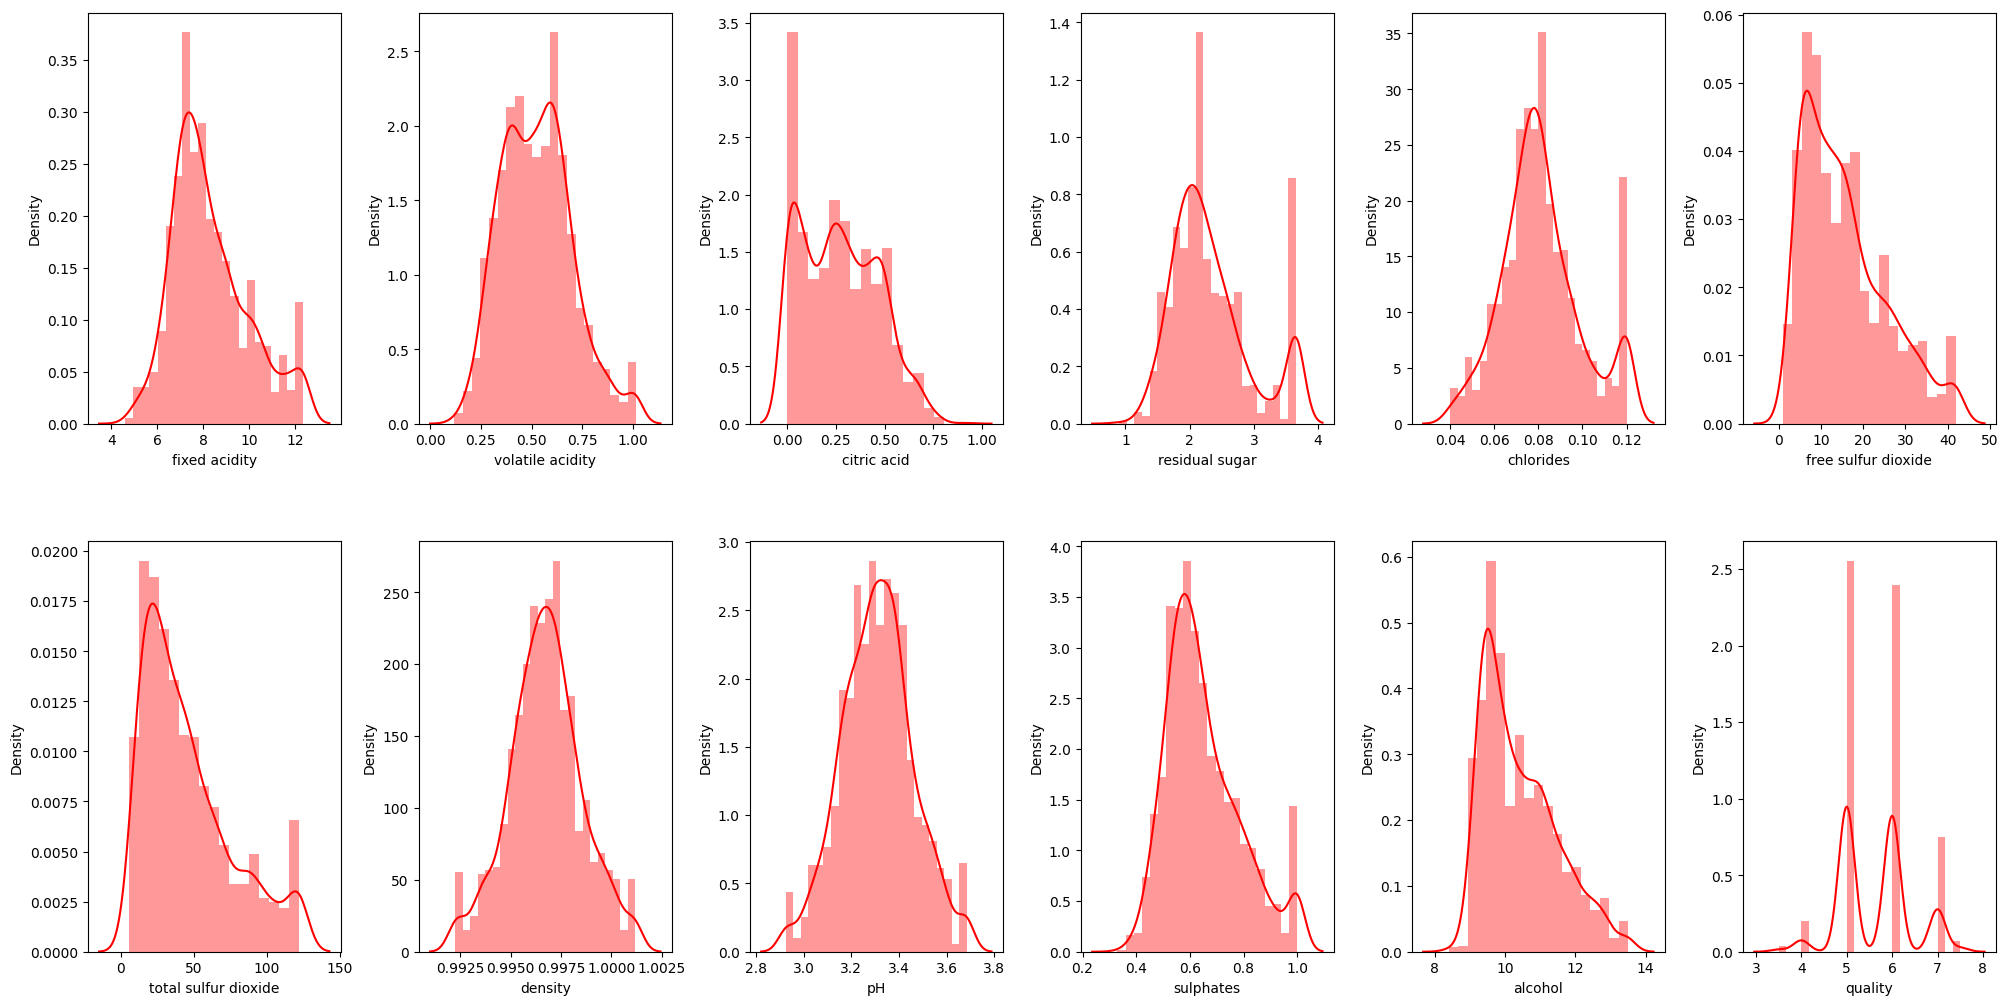

In [ ]:
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in red_wine.items():
    sns.distplot(value, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

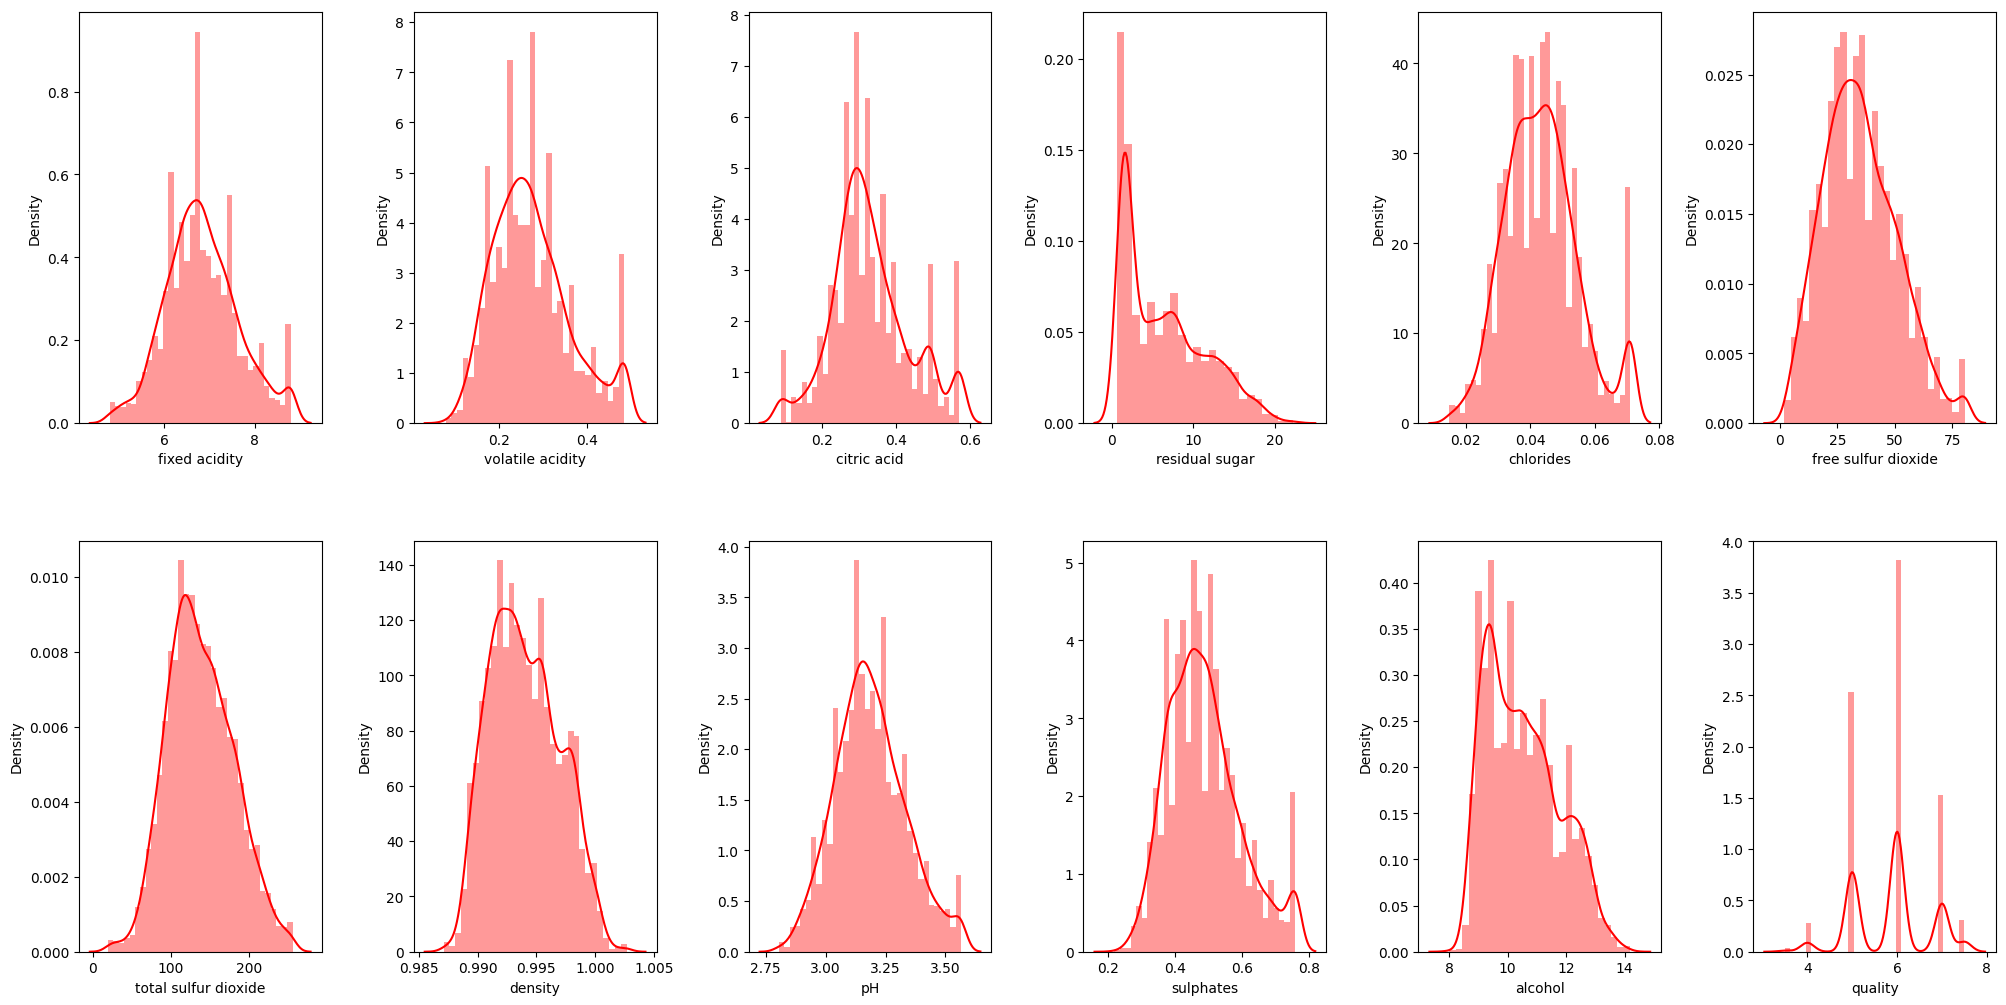

In [ ]:
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in white_wine.items():
    sns.distplot(value, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# def print_all_data_plots(data): # Just for creating all the plots at once for a dataset
#   print(data.describe())
#   print(red_wine.isnull().sum())
#   data['quality'].plot(kind='hist', bins=20, title='quality')
#   plt.gca().spines[['top', 'right',]].set_visible(False)
#   vs_plots(data)
#   plot_correlation(data)
#   boxplots(data)
#   sns.distplot(data['alcohol'])
#   skew(data['alcohol'])
#   fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
#   index = 0
#   ax = ax.flatten()

#   for col, value in data.items():
#       sns.distplot(value, color='r', ax=ax[index])
#       index += 1
#   plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# 3. Data preprocessing

It is worth pre-processing the data before training it. In the paper that was cited in the homework description, the authors only used data standardisation as the main method of data preprocessing.

I decided in this homework to test different combinations of data preprocessing methods and to consider more techniques. In addition to standardisation, I added normalisation, balanced the data using SMOTE, and removed the least important parameters identified using random forest. Also, to test the hypothesis, I made a function that reduces the number of quality classes, making the model coarser, while at the same time improving the accuracy of the predictions. Using the grid search in the next section, we will find the best combination of data preprocessing.


* **`standardize(data)`:**
   - **Purpose:** This function standardizes a given dataset using the `StandardScaler` from scikit-learn. Standardization involves rescaling the features so that they have a mean of 0 and a standard deviation of 1.
   - **Parameters:**
     - `data`: DataFrame to be standardized.
   - **Returns:**
     - `scaled_data`: The standardized DataFrame.
     - `mean`: The mean values for each feature used in scaling.
     - `std`: The standard deviation values for each feature used in scaling.

* **`normalize(data)`:**
   - **Purpose:** This function normalizes a dataset using the `MinMaxScaler` from scikit-learn, which scales each feature to a given range, typically between 0 and 1.
   - **Parameters:**
     - `data`: DataFrame to be normalized.
   - **Returns:**
     - `normalized_data`: The normalized DataFrame.
     - `min_val`: The minimum values for each feature used in scaling.
     - `max_val`: The maximum values for each feature used in scaling.

* **`inverse_standardize(scaled_data, mean, std)`:**
   - **Purpose:** Reverts the standardization process, transforming the scaled data back to its original scale using the provided mean and standard deviation values.
   - **Parameters:**
     - `scaled_data`: The standardized DataFrame to be inverted.
     - `mean`: The mean values used in the original scaling.
     - `std`: The standard deviation values used in the original scaling.
   - **Returns:**
     - `inverted`: The DataFrame after reversing the standardization.

* **`inverse_normalize(normalized_data, min_val, max_val)`:**
   - **Purpose:** Reverts the normalization process, converting the normalized data back to its original scale using the provided minimum and maximum values.
   - **Parameters:**
     - `normalized_data`: The normalized DataFrame to be inverted.
     - `min_val`: The minimum values used in the original scaling.
     - `max_val`: The maximum values used in the original scaling.
   - **Returns:**
     - `inverted`: The DataFrame after reversing the normalization.


In [ ]:
def standardize(data):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data))
    scaled_data.columns = data.columns
    mean = scaler.mean_
    std = scaler.scale_
    return scaled_data, mean, std

def normalize(data):
    scaler = MinMaxScaler()
    normalized_data = pd.DataFrame(scaler.fit_transform(data))
    normalized_data.columns = data.columns
    min_val = scaler.data_min_
    max_val = scaler.data_max_
    return normalized_data, min_val, max_val

def inverse_standardize(scaled_data, mean, std):
    scaler = StandardScaler()
    scaler.mean_ = mean
    scaler.scale_ = std
    inverted = pd.DataFrame(scaler.inverse_transform(scaled_data))
    return inverted

def inverse_normalize(normalized_data, min_val, max_val):
    scaler = MinMaxScaler()
    scaler.data_min_ = min_val
    scaler.data_max_ = max_val
    inverted = pd.DataFrame(scaler.inverse_transform(normalized_data))
    return inverted

* **`split_and_normalize_scale(X, Y, apply_normalization)`:**
   - **Purpose:** Splits the data into training and testing sets, then standardizes and optionally normalizes the X data.
   - **Parameters:**
     - `X`: Feature set.
     - `Y`: Target variable.
     - `apply_normalization`: Boolean flag to apply normalization after standardization.
   - **Returns:**
     - Scaled and optionally normalized training and testing sets of X, along with the corresponding Y training and testing sets.

* **`prepare_and_balance_data(Dataset, apply_normalization, apply_over_sampling)`:**
   - **Purpose:** Prepares a dataset for modeling by splitting it into features and target, optionally applying over-sampling using SMOTE to balance classes, and then standardizing and optionally normalizing the data.
   - **Parameters:**
     - `Dataset`: The complete dataset.
     - `apply_normalization`: Boolean flag to apply normalization.
     - `apply_over_sampling`: Boolean flag to apply over-sampling to balance classes.
   - **Returns:**
     - Processed training and testing sets for both features and target variables, ready for model training and evaluation.


SMOTE (Synthetic Minority Over-sampling Technique) works by identifying minority class instances in a dataset and creating synthetic samples that are variations of these instances. It does this by selecting a random neighbour for each minority instance, calculating the difference between their feature vectors, and generating new samples along the line segment between these instances. This process is repeated until the class distribution is adequately balanced, and the synthetic samples are then integrated into the original dataset to address class imbalance.

The drawback that we need to keep in mind is that it may introduce noise, especially with outlier samples or in sparse feature spaces, and is less effective with very small datasets.

In [ ]:
def split_and_normalize_scale(X,Y, apply_normalization):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
  scaled_X_train, mean_X_train, std_X_train = standardize(x_train)
  scaled_X_test, mean_X_test, std_X_test = standardize(x_test)

  if apply_normalization:
    normalized_scaled_X_train, min_val_scaled_X_train, max_val_scaled_X_train = normalize(scaled_X_train)
    normalized_scaled_X_test, min_val_scaled_X_test, max_val_scaled_X_test = normalize(scaled_X_test)
    return normalized_scaled_X_train, normalized_scaled_X_test, y_train, y_test
  else:
    return scaled_X_train, scaled_X_test, y_train, y_test

def prepare_and_balance_data(Dataset, apply_normalization, apply_over_sampling):
  X_, Y_ = splitting_into_X_Y(Dataset)
  Y_['quality'] = Y_['quality'].astype('category')
  if apply_over_sampling:
    unique_values = Dataset['quality'].unique()
    strategy = {value: 2300 for value in unique_values}
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore")
      oversample = SMOTE(sampling_strategy=strategy, k_neighbors=6)
      X_, Y_ = oversample.fit_resample(X_, Y_)

  x_tr, x_te, y_tr, y_te = split_and_normalize_scale(X_, Y_, apply_normalization)
  return x_tr, x_te, y_tr, y_te



It is important to note that standardisation and normalisation are used after splitting the dataset into training and test datasets to avoid data leakage and overestimation of model accuracy.

*map_quality* just decreases number of quality classes to three:
 * if the quality is lower than $5$ -- it is low (0)

 * if it is $5 \leqslant x \leqslant 6 $ -- it is average (1)

 * Higher than $6$ -- good (2)

In [ ]:
def map_quality(quality):
    if quality < 5:
        return 0
    elif quality >= 5 and quality <= 6:
        return 1
    else:
        return 2

## Side quest -- feature selection

The function `remove_least_important_features` is designed to reduce the dimensionality of a given DataFrame by removing features that are deemed least important according to their importance scores derived from a RandomForestRegressor model.

1. **Data Splitting:** The function begins by splitting the input DataFrame `df` into features (`X`) and target (`Y`) using the `splitting_into_X_Y` function.

2. **Model Training:** It then trains a RandomForestRegressor on these features and target. The model is configured with a specific `random_state` and `max_depth` to ensure consistent behavior.

3. **Feature Importance Computation:** After training, the function computes the importance of each feature using the trained model's `feature_importances_` attribute.

4. **Sorting and Selecting Features:** The features are sorted based on their importance, and the least important features are identified. The number of features to be removed is controlled by the parameter `num_features_to_remove`.

5. **Removing Features:** The identified least important features are removed from the original DataFrame, resulting in a reduced DataFrame.

6. **Optional Plotting:** If the `plot` parameter is set to True, the function will generate a plot showing the relative importance of each feature. This is helpful for visualizing which features are more significant than others in the model's decision-making process.

7. **Returning the Reduced DataFrame:** Finally, the function returns the DataFrame with the specified least important features removed.

In [ ]:
def remove_least_important_features(df, plot, num_features_to_remove=3):
    X, Y = splitting_into_X_Y(df)
    model = RandomForestRegressor(random_state=1, max_depth=12)
    model.fit(X.values, Y.values.ravel())
    importances = model.feature_importances_
    feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    features_to_remove = feature_importances_df.tail(num_features_to_remove)['Feature'].values
    df_reduced = df.drop(columns=features_to_remove)

    if plot:
      features = X.columns
      importances = model.feature_importances_
      indices = np.argsort(importances)[:]
      plt.title('Feature Importances')
      plt.barh(range(len(indices)), importances[indices], color='b', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()
      return df_reduced

    else:

      return df_reduced


Red wine


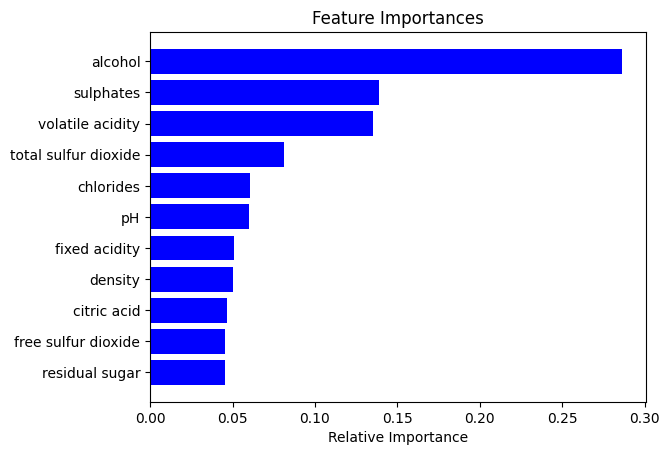

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.076,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.098,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.092,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.075,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.076,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.090,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.062,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.076,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.075,44.0,0.99547,3.57,0.71,10.2,5.0


In [ ]:
print('Red wine')
remove_least_important_features(red_wine, plot=True, num_features_to_remove=3)

White wine


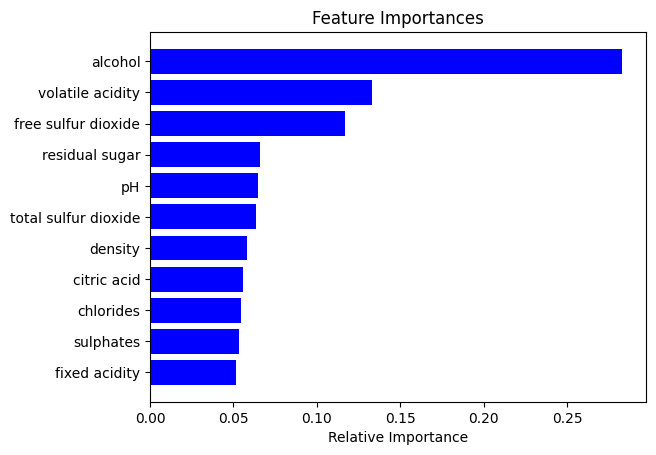

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,quality
0,0.27,0.36,20.7,45.0,170.0,1.00100,3.00,8.8,6.0
1,0.30,0.34,1.6,14.0,132.0,0.99400,3.30,9.5,6.0
2,0.28,0.40,6.9,30.0,97.0,0.99510,3.26,10.1,6.0
3,0.23,0.32,8.5,47.0,186.0,0.99560,3.19,9.9,6.0
4,0.23,0.32,8.5,47.0,186.0,0.99560,3.19,9.9,6.0
...,...,...,...,...,...,...,...,...,...
4893,0.21,0.29,1.6,24.0,92.0,0.99114,3.27,11.2,6.0
4894,0.32,0.36,8.0,57.0,168.0,0.99490,3.15,9.6,5.0
4895,0.24,0.19,1.2,30.0,111.0,0.99254,2.99,9.4,6.0
4896,0.29,0.30,1.1,20.0,110.0,0.98869,3.34,12.8,7.0


In [ ]:
print('White wine')
remove_least_important_features(white_wine, plot=True, num_features_to_remove=3)

As we can see, these least important characteristics are different for red and white wine, which is an additional argument for creating separate models. And yes, the most important parameter for both is the amount of alcohol.

The function `adjusted_train_test_split` is designed for preprocessing a dataset before training a machine learning model, with options for feature reduction, normalization, and class balancing.

1. **Feature Reduction (Optional):** If `to_reduce` is set to True, the function first reduces the dimensionality of the input dataset `data` by removing the least important features. This is achieved through the `remove_least_important_features` function, which identifies and drops the specified number of least significant features based on their importance scores from a RandomForestRegressor model.

2. **Data Preparation and Balancing:** The function then calls `prepare_and_balance_data` on the dataset. This step includes splitting the dataset into training and test sets (`x_train`, `x_test`, `y_train`, `y_test`), and optionally applying normalization and over-sampling to address class imbalance. The over-sampling is particularly useful in scenarios where some classes are underrepresented.

3. **Encoding Target Variable:** The function converts the target variable 'quality' into a numerical format suitable for classification. It does this by creating a mapping (`replacement_dict`) from the unique class labels to integers, and then applies this mapping to the target variable in both the training and test sets.

4. **One-Hot Encoding of Target:** The target variable (`y_train` and `y_test`) is then transformed into a one-hot encoded format using the `to_categorical` function. This is a common practice for multi-class classification problems, as it converts the target variable into a binary matrix representation.

5. **Returning the Processed Data:** Finally, the function returns the processed training and test sets (`x_train`, `x_test`, `y_train`, `y_test`). These datasets are now ready to be fed into a machine learning model for training and evaluation.

In [ ]:
def adjusted_train_test_split(data, to_reduce, apply_normalization, apply_over_sampling):
    if to_reduce:
        data = remove_least_important_features(data, plot=False, num_features_to_remove=3)
    x_train, x_test, y_train, y_test = prepare_and_balance_data(data, apply_normalization=apply_normalization, apply_over_sampling=apply_over_sampling)

    unique_classes = sorted(data['quality'].unique())
    num_classes = len(unique_classes)

    replacement_dict = {cls: idx for idx, cls in enumerate(unique_classes)}

    y_train['quality'] = y_train['quality'].replace(replacement_dict)
    y_test['quality'] = y_test['quality'].replace(replacement_dict)

    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    return x_train, x_test, y_train, y_test


# 4. Models training and evaluation

*create_and_compile_model(num_inputs, num_outputs)* is a function that creates a neural network model. It adjusts the first and last layers accordingly to the shape of the input dataframe. The dropout method is added to avoid overfitting. l2 regularizer in the first layer is added for the same reasons. L2 regularization helps to prevent overfitting by penalizing large weights.Originally, the rate of dropout was supposed to be a flag for grid search, but unfortunately, I do not have that many resources to check that many combinations. All the activation functions in hidden layers are 'relu'. For the last layer, I chose'softmax', assuming it should be fine for classification purposes. As a default choice, optimizer is set 'adam', loss -- 'categorical_crossentropy', since it is appropriate for classification.


In [ ]:
def create_and_compile_model(num_inputs, num_outputs):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Input(shape=(num_inputs,))) # input layer
    ann.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))) # hidden layer with regulatization l2
    ann.add(Dropout(0.2))  # Add a dropout layer with a 20% dropout rate
    ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
    ann.add(Dropout(0.2))
    ann.add(tf.keras.layers.Dense(units=8, activation='relu')) # just hidden layers
    ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=num_outputs, activation='softmax')) # output layer
    ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return ann

The function `calculate_sensitivity_specificity` calculates and prints the sensitivity and specificity for each class in a multi-class classification context, based on a confusion matrix and a DataFrame that contains the target variable 'quality'.

1. **Determine Number of Classes:**
   - The function starts by determining the number of unique classes in the 'quality' column of the `wine_dataframe`. This number defines how many classes the confusion matrix represents.

2. **Initialize Lists for Sensitivities and Specificities:**
   - Two lists, `specificities` and `sensitivities`, are initialized to store the calculated specificity and sensitivity values for each class.

3. **Iterate Over Each Class:**
   - The function then iterates over each class (from 0 to `num_classes - 1`). For each class, it calculates the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN) based on the confusion matrix:
     - **True Positives (TP):** The count of instances correctly identified as belonging to the current class.
     - **False Negatives (FN):** The count of instances from the current class that were incorrectly identified as not belonging to this class.
     - **False Positives (FP):** The count of instances not belonging to the current class but incorrectly identified as belonging to this class.
     - **True Negatives (TN):** The count of instances not belonging to the current class and correctly identified as not belonging to this class.

4. **Calculate Specificity and Sensitivity:**
   - **Specificity:** Calculated as `TN / (TN + FP)`, which measures the proportion of true negatives correctly identified out of all negative instances.
   - **Sensitivity:** Calculated as `TP / (TP + FN)`, also known as recall, which measures the proportion of true positives correctly identified out of all positive instances.

5. **Store and Print Results:**
   - The calculated specificity and sensitivity for each class are appended to their respective lists and printed out with a precision of four decimal places.

6. **Function Output:**
   - The function does not return any values, but it provides a detailed printout of specificity and sensitivity for each class.

In [ ]:
def calculate_sensitivity_specificity(conf_matrix, wine_dataframe):
    num_classes = len(wine_dataframe['quality'].unique())
    specificities = []
    sensitivities = []
    for i in range(num_classes):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - (tp + fn + fp)

        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        specificities.append(specificity)
        sensitivities.append(sensitivity)

        print(f"Class {i} Specificity: {specificity:.4f}")
        print(f"Class {i} Sensitivity: {sensitivity:.4f}")



`plot_loss_and_accuracy` just prints out plots for loss and accuracy by epochs during training, as stated in the name of the function. Loss is calculated as mean absolute error:
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$


In [ ]:
def plot_loss_and_accuracy(history):
    plt.plot(history.history['loss'], label='MAE training data')
    plt.plot(history.history['val_loss'], label='MAE validation data')
    plt.legend()
    plt.title('MAE for model')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.show()
    plt.close()

    plt.plot(history.history['accuracy'], label='Accuracy training data')
    plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
    plt.legend()
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.show()
    plt.close()

The function `evaluate_model` is designed to evaluate a trained artificial neural network (ANN) model on a test dataset.

1. **Model Prediction:**
   - The function uses the `predict` method of the ANN model to make predictions on the test feature set `x_test`. The output `y_pred` is an array of predicted probability distributions across the target classes for each sample.

2. **Class Prediction:**
   - It then converts these probabilities into class predictions using `np.argmax(y_pred, axis=1)`, which selects the class with the highest probability for each sample. This results in `y_pred_classes`, a one-dimensional array of predicted class labels.

3. **Test Class Labels:**
   - Similarly, the actual class labels `y_test` are converted from one-hot encoded format to class labels using `np.argmax(y_test, axis=1)`, resulting in `y_test_classes`.

4. **Confusion Matrix:**
   - A confusion matrix is computed using the `confusion_matrix` function from scikit-learn, which compares the predicted class labels (`y_pred_classes`) with the actual class labels (`y_test_classes`). The confusion matrix provides a detailed breakdown of correct and incorrect classifications for each class.

5. **Return Values:**
   - The function returns the confusion matrix, the predicted class labels (`y_pred_classes`), and the actual class labels (`y_test_classes`).


In [ ]:
def evaluate_model(ann, x_test, y_test):
    y_pred = ann.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    return conf_matrix, y_pred_classes, y_test_classes

`plot_confusion_matrix`  does exactly what it is stated in the title

In [ ]:
def plot_confusion_matrix(conf_matrix, wine_dataframe):
    df_cm = pd.DataFrame(conf_matrix, index=[i for i in np.sort(wine_dataframe['quality'].unique())],
                         columns=[i for i in np.sort(wine_dataframe['quality'].unique())])
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt="d")

The same thing here.

In [ ]:
def generate_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

The function `perform_cross_validation` performs cross-validation on a given dataset for a neural network model.

1. **Setup Cross-Validation:**
   - A `StratifiedKFold` object is created with 5 splits, shuffling enabled, and a set random state. StratifiedKFold ensures that each fold of the dataset has the same proportion of class labels as the entire dataset, which is particularly important for datasets with imbalanced classes.

2. **Initialize Scores List:**
   - An empty list `scores` is initialized to store the accuracy of the model on each fold.

3. **Feature and Target Splitting:**
   - The dataset is split into features (`X`) and target (`Y`) using the `splitting_into_X_Y` function.

4. **Cross-Validation Loop:**
   - The function iterates over each fold defined by the StratifiedKFold split. For each iteration, it performs the following steps:
     - **Data Preparation:** It calls `adjusted_train_test_split` to prepare the training and testing data. This includes optional feature reduction, normalization, and over-sampling.
     - **Model Creation and Compilation:** A new ANN model is created for each fold using `create_and_compile_model`, with the number of inputs and outputs adjusted according to the training data and the number of unique classes in `Y`.
     - **Model Training:** The ANN is trained using the `fit` method with the specified `epochs` and `batch_size`, and with verbosity set to 0 (silent mode).
     - **Model Evaluation:** The trained model is evaluated on the test set, and the accuracy is retrieved.

5. **Accuracy Calculation and Printing:**
   - After all folds are processed, the average accuracy across all folds is calculated, rounded to three decimal places, and printed.

6. **Return Average Accuracy:**
   - Finally, the function returns the calculated average accuracy.

In [ ]:
def perform_cross_validation(wine_dataframe, to_reduce, apply_normalization, apply_over_sampling, epochs, batch_size):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
    scores = []
    X, Y = splitting_into_X_Y(wine_dataframe)
    for train, test in kfold.split(X, Y):
        x_train, x_test, y_train, y_test = adjusted_train_test_split(wine_dataframe, to_reduce, apply_normalization, apply_over_sampling)

        ann = create_and_compile_model(x_train.shape[1], len(wine_dataframe['quality'].unique()))
        ann.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss, accuracy = ann.evaluate(x_test, y_test, verbose=0)
        scores.append(accuracy)

    print("Average accuracy across cross-validation:", np.round(np.mean(scores), 3))

    return np.round(np.mean(scores), 3)

The function `train_neural_network` is a blackbox:

1. **Optional Class Reduction:**
   - If `to_decrease_num_classes` is True, it applies a function `map_quality` to the 'quality' column of `wine_dataframe`. This function likely maps multiple quality ratings into fewer categories to simplify the classification problem.

2. **Removing Sparse Classes:**
   - The function removes classes with very few samples (less than 10 in this case) to avoid issues with training and model performance.

3. **Data Preparation and Splitting:**
   - It then prepares the data by calling `adjusted_train_test_split`, which includes optional feature reduction, normalization, over-sampling, and splits the data into training and testing sets.

4. **Model Initialization:**
   - The ANN model is initialized using `create_and_compile_model` with the number of inputs and outputs determined by the training data and the unique classes in 'quality'.

5. **Model Training:**
   - The ANN is trained using the training data with specified `epochs` and `batch_size`, and the test set is used for validation.

6. **Plotting Loss and Accuracy:**
   - The function `plot_loss_and_accuracy` is called to visualize the training and validation loss and accuracy over epochs.

7. **Model Evaluation:**
   - The trained model is evaluated using the test data by `evaluate_model`, which returns a confusion matrix, predicted, and actual class labels.

8. **Confusion Matrix Plotting:**
   - It plots the confusion matrix using `plot_confusion_matrix` for a visual representation of the model's performance.

9. **Sensitivity and Specificity Calculation:**
   - Calculates and prints the sensitivity and specificity for each class using `calculate_sensitivity_specificity`.

10. **Classification Report:**
    - Generates a classification report using `generate_classification_report`, providing detailed metrics like precision, recall, and F1-score.

11. **Model Summary:**
    - Prints a summary of the ANN model architecture using `ann.summary()`.

12. **Cross-Validation:**
    - Performs cross-validation on the dataset using `perform_cross_validation` and returns the average accuracy across folds.

13. **Return Accuracy:**
    - Returns the accuracy obtained from cross-validation.



In [ ]:
def train_neural_network(wine_dataframe, to_reduce, apply_normalization, apply_over_sampling, to_decrease_num_classes, epochs, batch_size):
    if to_decrease_num_classes:
        wine_dataframe['quality'] = wine_dataframe['quality'].apply(map_quality)

    class_counts = wine_dataframe['quality'].value_counts()
    classes_to_remove = class_counts[class_counts < 10].index
    wine_dataframe = wine_dataframe[~wine_dataframe['quality'].isin(classes_to_remove)]

    x_train, x_test, y_train, y_test = adjusted_train_test_split(wine_dataframe, to_reduce, apply_normalization, apply_over_sampling)
    num_inputs = x_train.shape[1]
    num_outputs = len(wine_dataframe['quality'].unique())

    ann = create_and_compile_model(num_inputs, num_outputs)

    history = ann.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

    plot_loss_and_accuracy(history)

    conf_matrix, y_pred, y_test = evaluate_model(ann, x_test, y_test)

    plot_confusion_matrix(conf_matrix, wine_dataframe)

    calculate_sensitivity_specificity(conf_matrix, wine_dataframe)

    generate_classification_report(y_test, y_pred)

    ann.summary()

    acc = perform_cross_validation(wine_dataframe, to_reduce, apply_normalization, apply_over_sampling, epochs, batch_size)

    return acc


# 5. Benchmarking

The function `run_parameter_combinations` systematically tests various configurations of parameters for training a neural network on a given dataset. This approach, known as *grid search*, is valuable for hyperparameter tuning and identifying the best model settings. Here's an overview of the function's process:

1. **Copying the Original Dataset:**
   - The function begins by creating a deep copy of the original dataset to preserve its state. This is important since the dataset may be modified during the training process.

2. **Defining Parameter Sets:**
   - Sets of possible values for each parameter are defined. These include booleans for feature reduction (`to_reduce_values`), normalization (`apply_normalization_values`), over-sampling (`apply_over_sampling_values`), and class reduction (`to_decrease_num_classes_values`), along with specific values for `epochs` and `batch_size`.

3. **Generating Parameter Combinations:**
   - It uses `itertools.product` to generate all possible combinations of these parameters, creating a comprehensive grid of different configurations to test.

4. **Iterating Over Combinations:**
   - The function iterates over each parameter combination. For each combination, it:
     - Prints the parameters being tested.
     - Deep copies the original dataset again to ensure each test starts with the unmodified data.
     - Calls `train_neural_network` with the current set of parameters to train the model and get the cross-validation accuracy.

5. **Storing Results:**
   - The results (parameters and obtained cross-validation accuracy) are appended to the `results_df` DataFrame. This is done using `DataFrame.append`, ensuring that the results are recorded even if some combinations throw an error.

6. **Error Handling:**
   - If an error occurs during training with a particular set of parameters (caught as a `ValueError`), the function prints the error message and continues with the next combination. This error occurs in case of white wines, since there are enough samples and no need for over-sampling. I know, this might me debatable.

7. **Returning Results DataFrame:**
   - Finally, the function returns the updated `results_df`, which now contains the cross-validation accuracies for each parameter combination.

I would like to point out that in this grid search setup, the maximum number of models to be checked is equal to the product of the number of settings (i.e. 16 in the end, if no errors are missed). Of course, it is possible to add more options for checking epochs and batch sizes (and this was done separately), but unfortunately neither google colab nor my computer resources will be enough to check so many models. But the original idea was this.

In [ ]:
def run_parameter_combinations(dataset, results_df):
    original_dataset = copy.deepcopy(dataset)

    to_reduce_values = [True, False]
    apply_normalization_values = [True, False]
    apply_over_sampling_values = [True, False]
    to_decrease_num_classes_values = [True, False]
    epochs_values = [50]
    batch_size_values = [32]


    parameter_combinations = itertools.product(
        to_reduce_values, apply_normalization_values, apply_over_sampling_values,
        to_decrease_num_classes_values, epochs_values, batch_size_values
    )

    for params in parameter_combinations:
        to_reduce, apply_normalization, apply_over_sampling, to_decrease_num_classes, epochs, batch_size = params
        print("Testing with parameters:", params)

        try:
            dataset = copy.deepcopy(original_dataset)
            accuracy = train_neural_network(dataset, to_reduce, apply_normalization, apply_over_sampling, to_decrease_num_classes, epochs, batch_size)
            results_df = results_df.append({
                'to_reduce': to_reduce,
                'apply_normalization': apply_normalization,
                'apply_over_sampling': apply_over_sampling,
                'to_decrease_num_classes': to_decrease_num_classes,
                'epochs': epochs,
                'batch_size': batch_size,
                'cross_val_accuracy': accuracy
            }, ignore_index=True)
        except ValueError as e:
            print(f"Error in the combination {params}: {e}")
            continue
    return results_df



In [ ]:
%%capture

results_red = pd.DataFrame(columns=[
    'to_reduce', 'apply_normalization', 'apply_over_sampling',
    'to_decrease_num_classes', 'epochs', 'batch_size', 'cross_val_accuracy'
])
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
results_rw = run_parameter_combinations(red_wine, results_red)

results_white = pd.DataFrame(columns=[
    'to_reduce', 'apply_normalization', 'apply_over_sampling',
    'to_decrease_num_classes', 'epochs', 'batch_size', 'cross_val_accuracy'
])

white_wine = pd.read_csv('winequality-white.csv', sep = ';')
results_ww = run_parameter_combinations(white_wine, results_white)



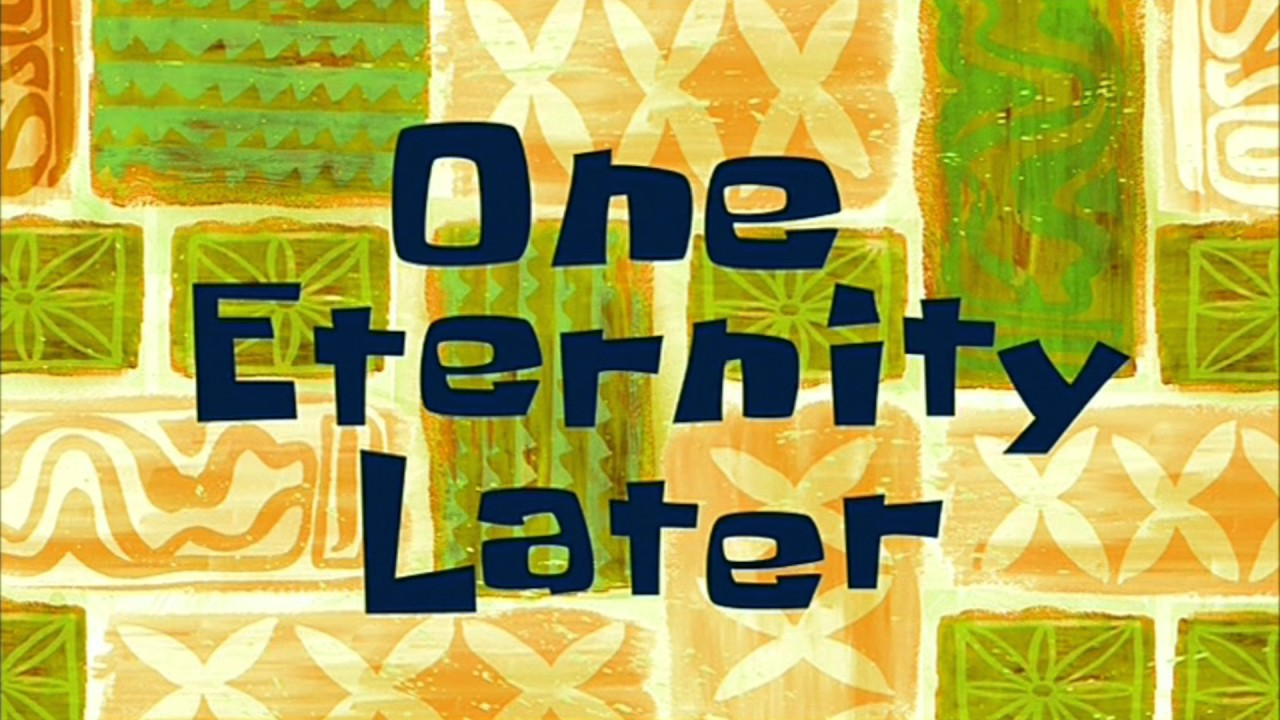

In [ ]:
results_rw


,to_reduce,apply_normalization,apply_over_sampling,to_decrease_num_classes,epochs,batch_size,cross_val_accuracy
0,True,True,True,True,50,32,0.758
1,True,True,True,False,50,32,0.647
2,True,True,False,True,50,32,0.819
3,True,True,False,False,50,32,0.573
4,True,False,True,True,50,32,0.820
5,True,False,True,False,50,32,0.701
6,True,False,False,True,50,32,0.828
7,True,False,False,False,50,32,0.563
8,False,True,True,True,50,32,0.786
9,False,True,True,False,50,32,0.651


In [ ]:
results_ww

,to_reduce,apply_normalization,apply_over_sampling,to_decrease_num_classes,epochs,batch_size,cross_val_accuracy
0,True,True,True,False,50,32,0.285
1,True,True,False,True,50,32,0.749
2,True,True,False,False,50,32,0.444
3,True,False,True,False,50,32,0.555
4,True,False,False,True,50,32,0.774
5,True,False,False,False,50,32,0.540
6,False,True,True,False,50,32,0.425
7,False,True,False,True,50,32,0.755
8,False,True,False,False,50,32,0.455
9,False,False,True,False,50,32,0.566


In [ ]:
max_row_red = results_rw.loc[results_rw['cross_val_accuracy'].idxmax()]
max_row_white = results_ww.loc[results_ww['cross_val_accuracy'].idxmax()]
print(f'Optimal parameters for Red Wine NN are \n {max_row_red}')
print(f'Optimal parameters for White Wine NN are \n {max_row_white}')


Optimal parameters for Red Wine NN are 
 to_reduce                  False
apply_normalization        False
apply_over_sampling         True
to_decrease_num_classes     True
epochs                        50
batch_size                    32
cross_val_accuracy         0.843
Name: 12, dtype: object
Optimal parameters for White Wine NN are 
 to_reduce                  False
apply_normalization        False
apply_over_sampling        False
to_decrease_num_classes     True
epochs                        50
batch_size                    32
cross_val_accuracy         0.776
Name: 10, dtype: object


As a result of the grid serch function, for red wine, we obtained 16 combinations, of which the best one is with oversampling and reduction of the number of classes; for white wine, it is enough just to reduce the number of classes; only 12 models are considered for this type. Overall, the cross-validation values give good value considering the noise in the data.

# 6. Results

## 6.0 Red wine models reports

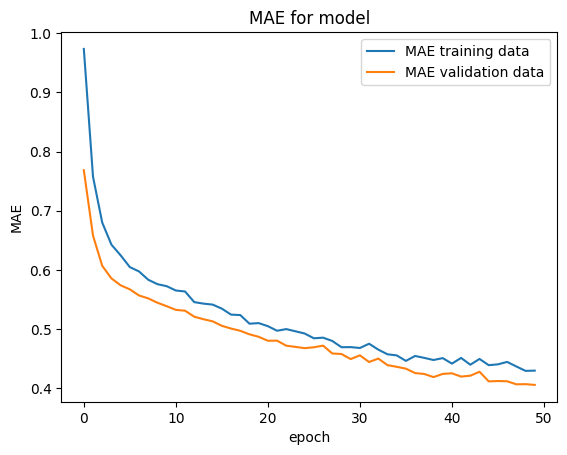

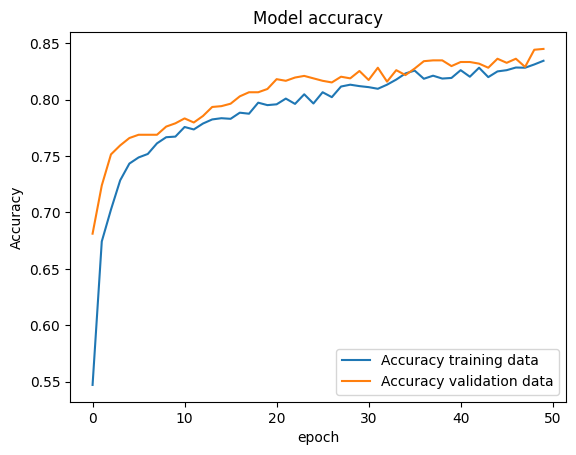

44/44 [==============================] - 0s 2ms/step
Class 0 Specificity: 0.9054
Class 0 Sensitivity: 0.9636
Class 1 Specificity: 0.9540
Class 1 Sensitivity: 0.6373
Class 2 Specificity: 0.9083
Class 2 Sensitivity: 0.9389
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       439
           1       0.88      0.64      0.74       466
           2       0.84      0.94      0.89       475

    accuracy                           0.84      1380
   macro avg       0.85      0.85      0.84      1380
weighted avg       0.85      0.84      0.84      1380

Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_875 (Dense)           (None, 16)                192       
                                                                 
 dropout_350 (Dropout)       (None, 16)                0         
                     

0.839

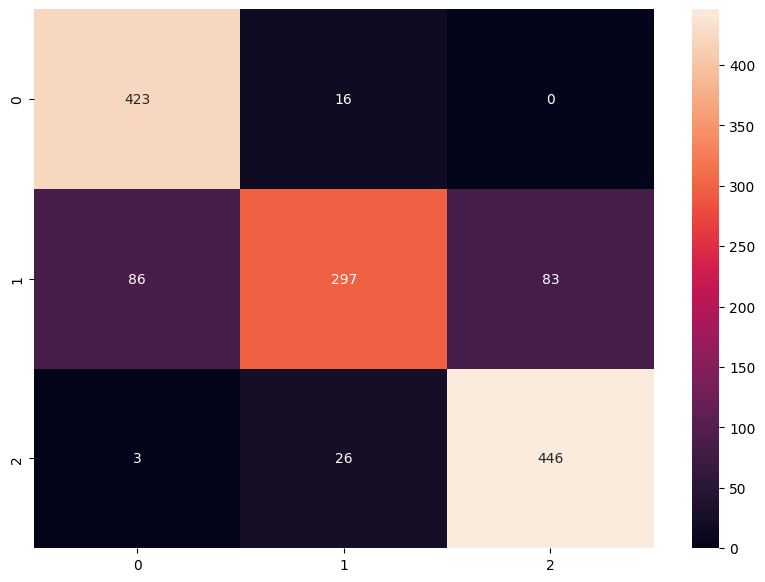

In [ ]:
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
train_neural_network(red_wine, to_reduce=False, apply_normalization=False, apply_over_sampling=True, to_decrease_num_classes=True, epochs=50, batch_size=32)

Despite quite passable accuracy rates, both on training and cross-validation, the loss function remains around 0.4 at best. Again, this is directly related to the quality of the data, I believe. The small difference in accuracy between training and test indicates that the model is unlikely to be over-trained. Recall that there are "bad wines" 1 is average, and 2 is good. The values are not very good only for the sensitivity in the medium class; I risk to assume this is due to the fact that there were initially more examples and more outliers, which was evident from the boxplots. The accuracy values exceed 0.8, which can be considered a good result.

Next, consider the model for red wines, but only using oversampling. Here the situation is somewhat more tragic than for the previous model: accuracy indicators are somewhat lower, and the loss function has more monstrous indicators in the region of 0.8. I can assume that the configuration of the neural network is unsuitable and that it is worth reducing the number of layers in the future, as the situation is reminiscent of overtraining. In this case, the classes from 3 to 8 are renamed in order from 0 to 5. Problems arose for Class 2 sensitivity and Class 3 sensitivity; again, it is with those classes that the most examples and outliers occurred. The accuracy on validation is 0.738, which is quite good.

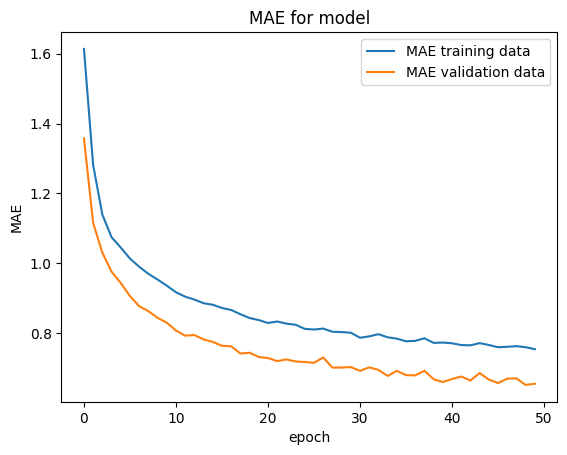

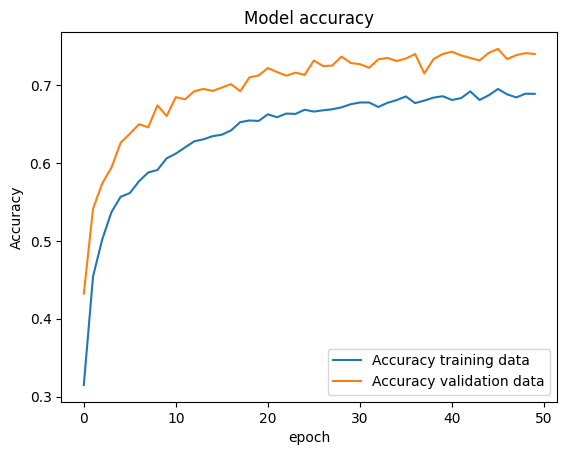

87/87 [==============================] - 0s 2ms/step
Class 0 Specificity: 0.9983
Class 0 Sensitivity: 1.0000
Class 1 Specificity: 0.9394
Class 1 Sensitivity: 0.8226
Class 2 Specificity: 0.9186
Class 2 Sensitivity: 0.5637
Class 3 Specificity: 0.9262
Class 3 Sensitivity: 0.3710
Class 4 Specificity: 0.9237
Class 4 Sensitivity: 0.7401
Class 5 Specificity: 0.9822
Class 5 Sensitivity: 0.9523
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       462
           1       0.73      0.82      0.77       451
           2       0.58      0.56      0.57       463
           3       0.51      0.37      0.43       469
           4       0.66      0.74      0.70       454
           5       0.91      0.95      0.93       461

    accuracy                           0.74      2760
   macro avg       0.73      0.74      0.73      2760
weighted avg       0.73      0.74      0.73      2760

Model: "sequential_181"
_____________________

0.738

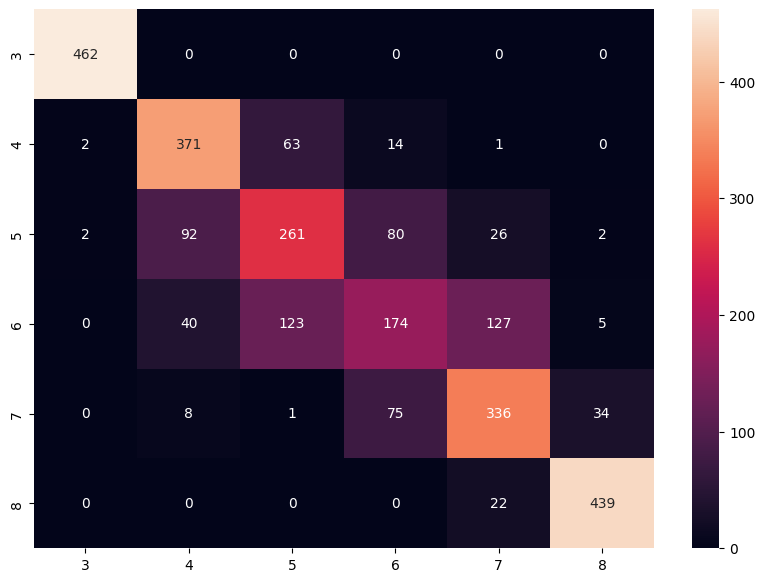

In [ ]:
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
train_neural_network(red_wine, to_reduce=False, apply_normalization=False, apply_over_sampling=True, to_decrease_num_classes=False, epochs=50, batch_size=32)

## 6.1 White wine models reports

For white wines, the most successful model involves only a reduction in the number of classes. The accuracy data is noisier, the loss function is unfortunately above 0.5. For white wines, the most successful model involves only a reduction in the number of classes. The accuracy data is noisier, the loss function is unfortunately above 0.5. Class 0 Sensitivity, Class 1 Specificity, Class 2 Sensitivity gave not very good values. In this case the classes were not balanced, which may explain the sag in these figures. The precision score on cross validation is 0.772, slightly lower than for red wines.

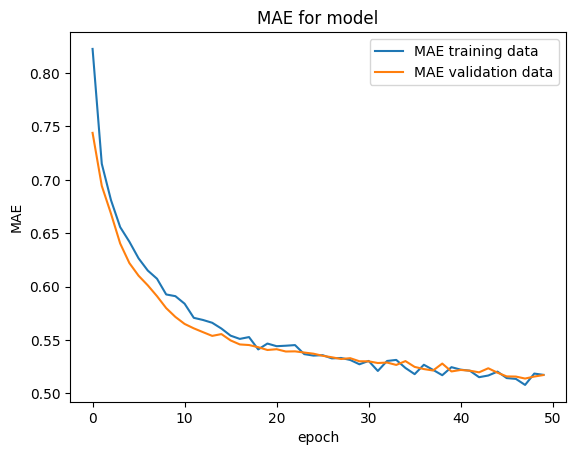

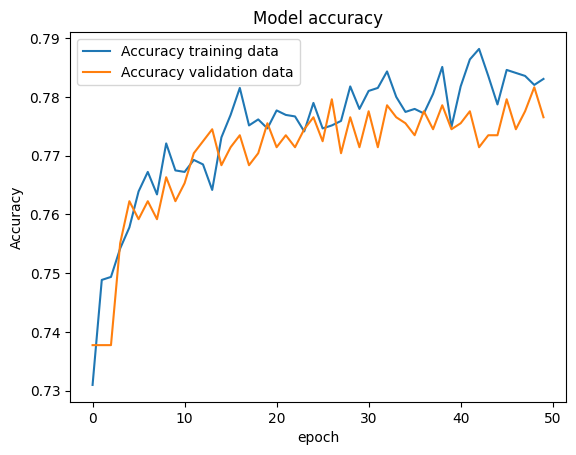

31/31 [==============================] - 0s 3ms/step
Class 0 Specificity: 0.9989
Class 0 Sensitivity: 0.0333
Class 1 Specificity: 0.3580
Class 1 Sensitivity: 0.9253
Class 2 Specificity: 0.9296
Class 2 Sensitivity: 0.4009
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.80      0.93      0.86       723
           2       0.63      0.40      0.49       227

    accuracy                           0.78       980
   macro avg       0.64      0.45      0.47       980
weighted avg       0.75      0.78      0.75       980

Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_935 (Dense)           (None, 16)                192       
                                                                 
 dropout_374 (Dropout)       (None, 16)                0         
                     

0.772

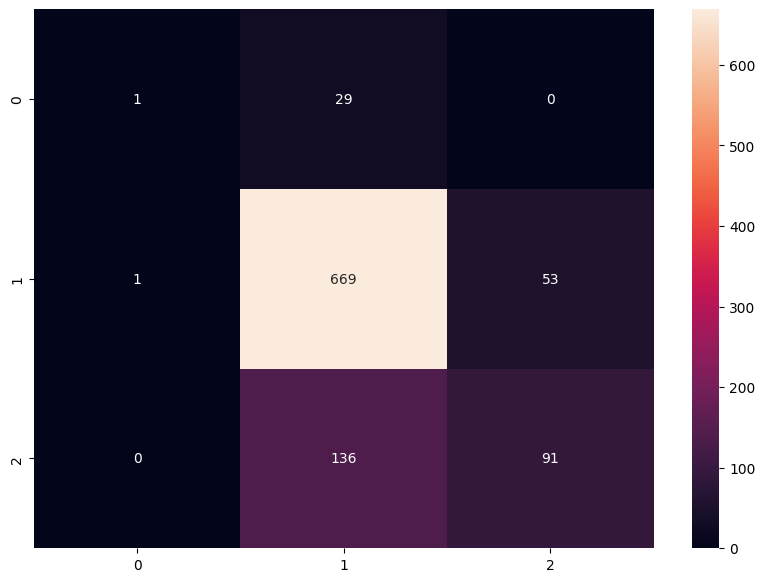

In [ ]:
white_wine = pd.read_csv('winequality-white.csv', sep = ';')
train_neural_network(white_wine, to_reduce=False, apply_normalization=False, apply_over_sampling=False, to_decrease_num_classes=True, epochs=50, batch_size=32)

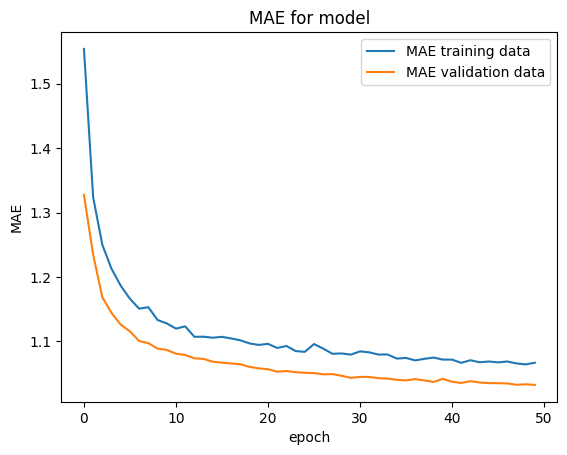

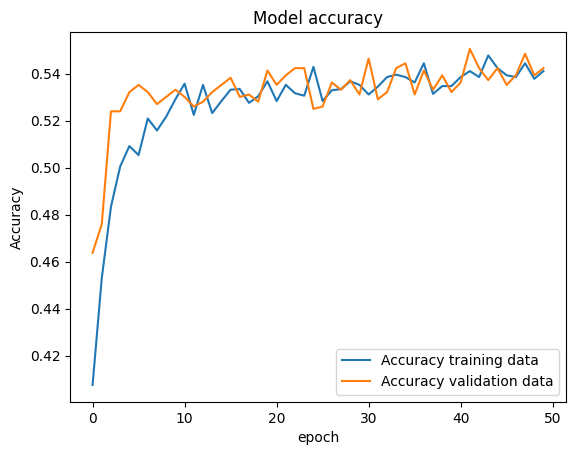

31/31 [==============================] - 0s 2ms/step
Class 0 Specificity: 1.0000
Class 0 Sensitivity: 0.0000
Class 1 Specificity: 1.0000
Class 1 Sensitivity: 0.0370
Class 2 Specificity: 0.8283
Class 2 Sensitivity: 0.5594
Class 3 Specificity: 0.4552
Class 3 Sensitivity: 0.7269
Class 4 Specificity: 0.9468
Class 4 Sensitivity: 0.2339
Class 5 Specificity: 1.0000
Class 5 Sensitivity: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.04      0.07        27
           2       0.57      0.56      0.57       286
           3       0.54      0.73      0.62       454
           4       0.48      0.23      0.31       171
           5       0.00      0.00      0.00        35

    accuracy                           0.54       979
   macro avg       0.43      0.26      0.26       979
weighted avg       0.53      0.54      0.51       979

Model: "sequential_193"
_____________________

0.543

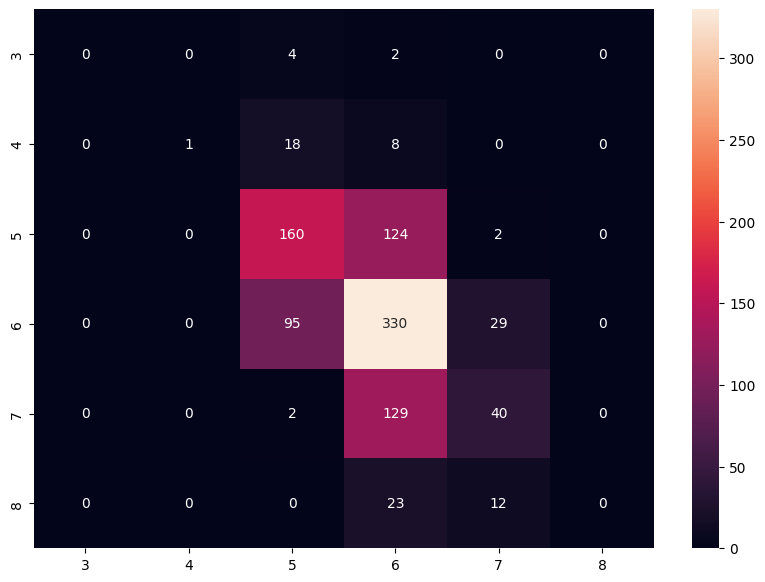

In [ ]:
white_wine = pd.read_csv('winequality-white.csv', sep = ';')
train_neural_network(white_wine, to_reduce=True, apply_normalization=False, apply_over_sampling=False, to_decrease_num_classes=False, epochs=50, batch_size=32)

Consider a model where only a reduction in the number of parameters is used. In general, the performance on cross validation is below 0.6, loss function is above 1, Class 0 Sensitivity, Class 1 Sensitivity: 0.0370, Class 2 Sensitivity: 0.5594,
Class 3 Specificity: 0.4552, Class 4 Sensitivity: 0.2339 -- overall, the landscape is sad and shows the importance of data preprocessing.

From the data we can conclude that the data for white wine is more complex than for red wine and requires more careful preprocessing. We can assume that if the dataset for red wines had more examples, we would see a similar pattern. If we examine the grid serch data, we can see that the models without normalisation perform better. In most cases, reducing the number of quality classes gives better results, which is to be expected. Oversampling helps with unbalanced data.

The additional information that we can extract from the accuracy plots is that it is better to increase batch size if we see a zigzag-ish trend.